# 1. preprocessing

### 1-0) Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

### 1-1) Loading Data

In [2]:
sub=pd.read_csv('submission.csv')
data=pd.read_csv('201901-202003.csv')
data.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
data.head(2)

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8


In [3]:
sub.head(2)

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   연월        int64 
 1   카드이용_시도   object
 2   카드이용_시군구  object
 3   업종명       object
 4   고객거주_시도   object
 5   고객거주_시군구  object
 6   연령대       object
 7   성별        int64 
 8   가구생애주기    int64 
 9   이용고객수     int64 
 10  이용금액      int64 
 11  이용건수      int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


### 1-2) Missing Values

In [5]:
data.isnull().sum()

연월               0
카드이용_시도          0
카드이용_시군구     87213
업종명              0
고객거주_시도          0
고객거주_시군구    147787
연령대              0
성별               0
가구생애주기           0
이용고객수            0
이용금액             0
이용건수             0
dtype: int64

카드이용_시군구 와 고객거주_시군구의 결측치가 다르다.

In [6]:
data_nullcard = data[data['카드이용_시군구'].isnull()==True]
data_nullcard['카드이용_시도'].unique()

array(['세종'], dtype=object)

카드이용_시군구의 결측치는 카드이용_시도의 '세종' 지역에만 나타나는 것을 확인

In [7]:
data_nullhom = data[data['고객거주_시군구'].isnull()==True]
data_nullhom['고객거주_시도'].unique()

array(['세종'], dtype=object)

고객거주_시군구의 결측치는 고객거주_시도의 '세종' 지역에만 나타나는 것을 확인,<br>
크게 잘라서 비교를 할거라서 카드이용_시군구, 고객거주_시군구는 데이터 프레임에서 삭제

In [8]:
del data['고객거주_시군구']
del data['카드이용_시군구']
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8


### 1-3) 연령대

In [9]:
data['연령대'] = data['연령대'].str.rstrip('s').astype('int')
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8


In [10]:
data['연령대'].dtypes

dtype('int32')

### 1-4) Outlier

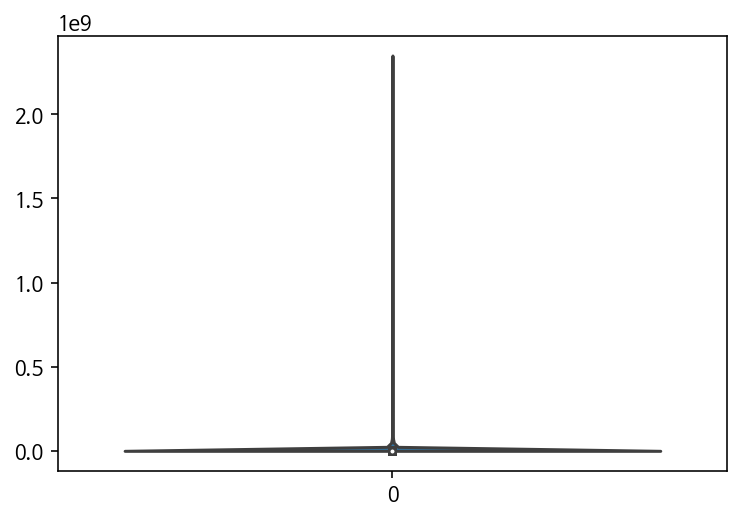

In [11]:
sns.violinplot(data=data.이용금액)
plt.show() 

C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


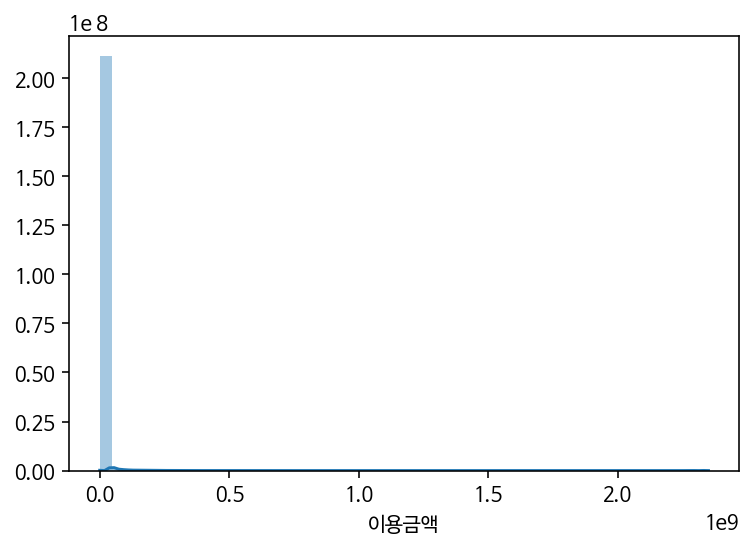

In [12]:
sns.distplot(data['이용금액'])

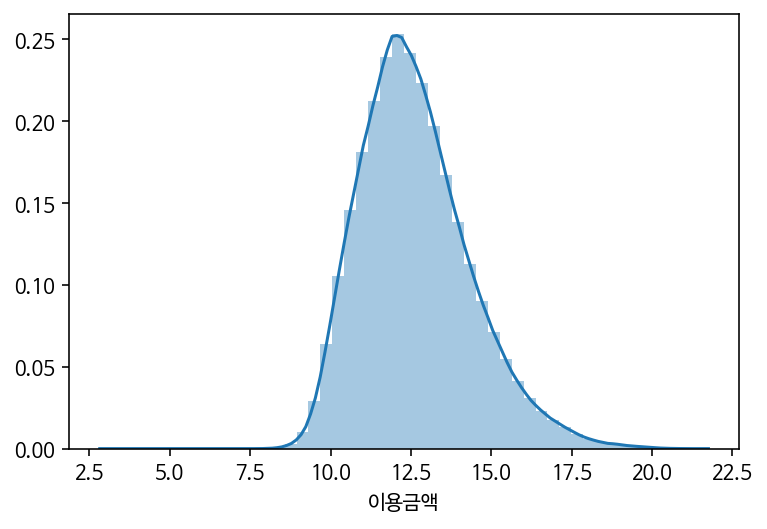

In [13]:
log_AMT = np.log(data['이용금액'])
sns.distplot(log_AMT)

# 2. Visualize columns

### 2-1) 연령대

In [14]:
print( data.연령대.unique())
df1_age = pd.DataFrame(data.연령대.value_counts().sort_index(ascending=True) )
df1_age

[20 30 40 50 60 70 10]


,연령대
10,314674
20,5091675
30,5550519
40,5802447
50,4455687
60,2606168
70,876622


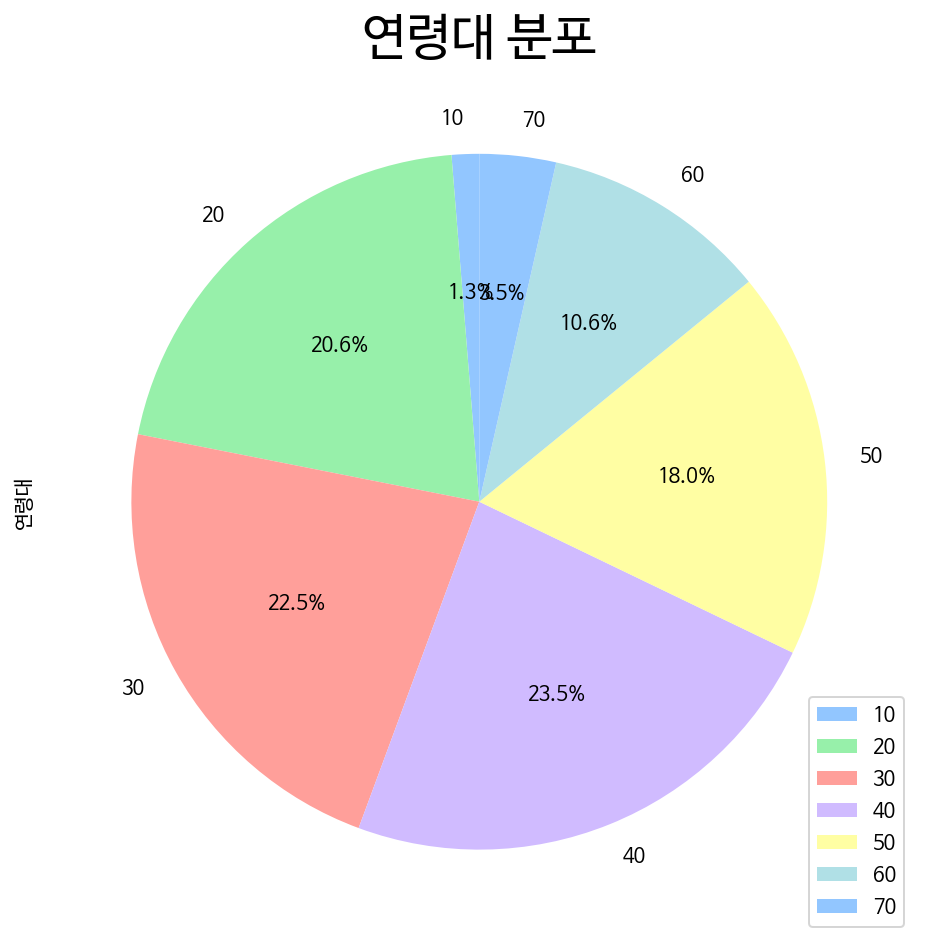

In [15]:
plt.style.use( 'seaborn-pastel')
df1_age.plot( kind = 'pie', figsize = (8,8),autopct = '%1.1f%%', startangle = 90 ,subplots=True)
plt.title( '연령대 분포', size = 25 )
plt.show()

40-30-20-50-70-10대 순으로 카드를 많이 썼다.

### 2-2) 성별

In [16]:
print( data.성별.unique())
df1_sex = data.성별.value_counts()
df1_sex = pd.DataFrame(data=df1_sex)
df1_sex 

[1 2]


,성별
1,14506378
2,10191414


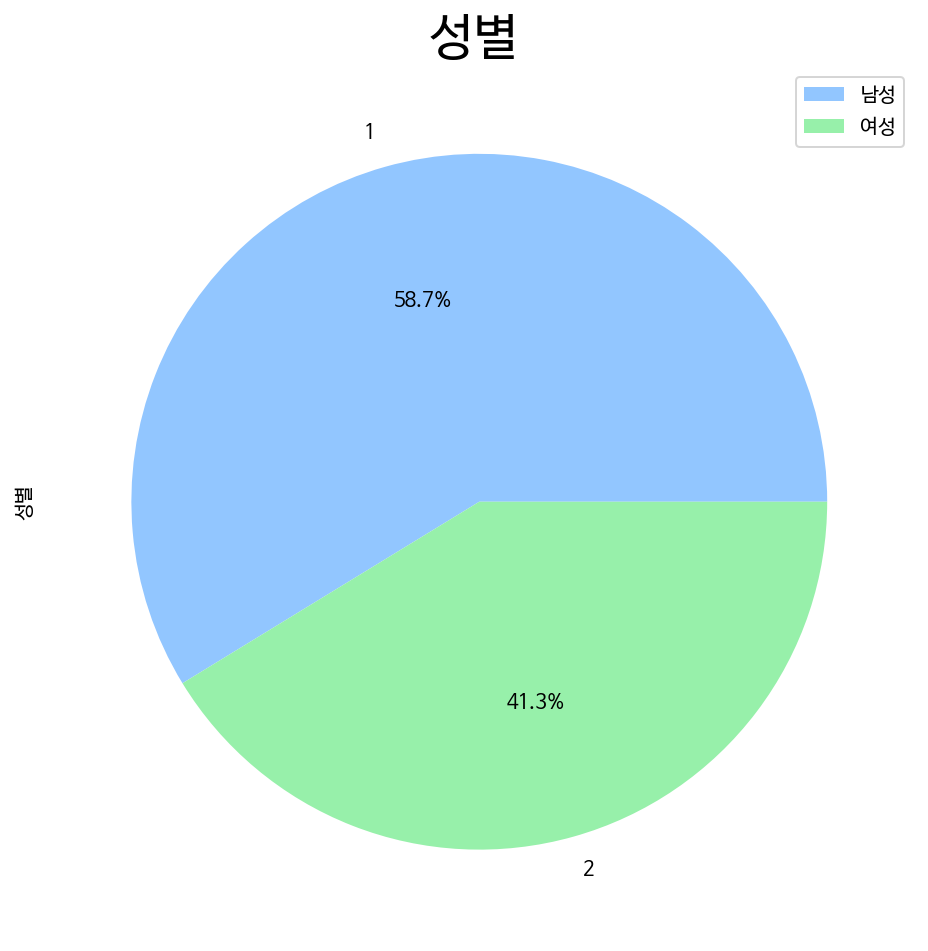

In [17]:
plt.style.use( 'seaborn-pastel')
df1_sex.plot( kind = 'pie', figsize = (8,8), autopct = '%1.1f%%' ,subplots=True   )
plt.title( '성별 ', size = 25 )
plt.legend(labels=('남성','여성'))

남성의 카드사용 횟수가 좀더 많다.

### 2-3) 가구생애주기

In [18]:
print( data.가구생애주기.unique()) 
df1_cycle = pd.DataFrame(  data.가구생애주기.value_counts().sort_index(ascending=True) )
df1_cycle

[1 2 3 4 5]


,가구생애주기
1,5526140
2,6188801
3,4054741
4,5445320
5,3482790


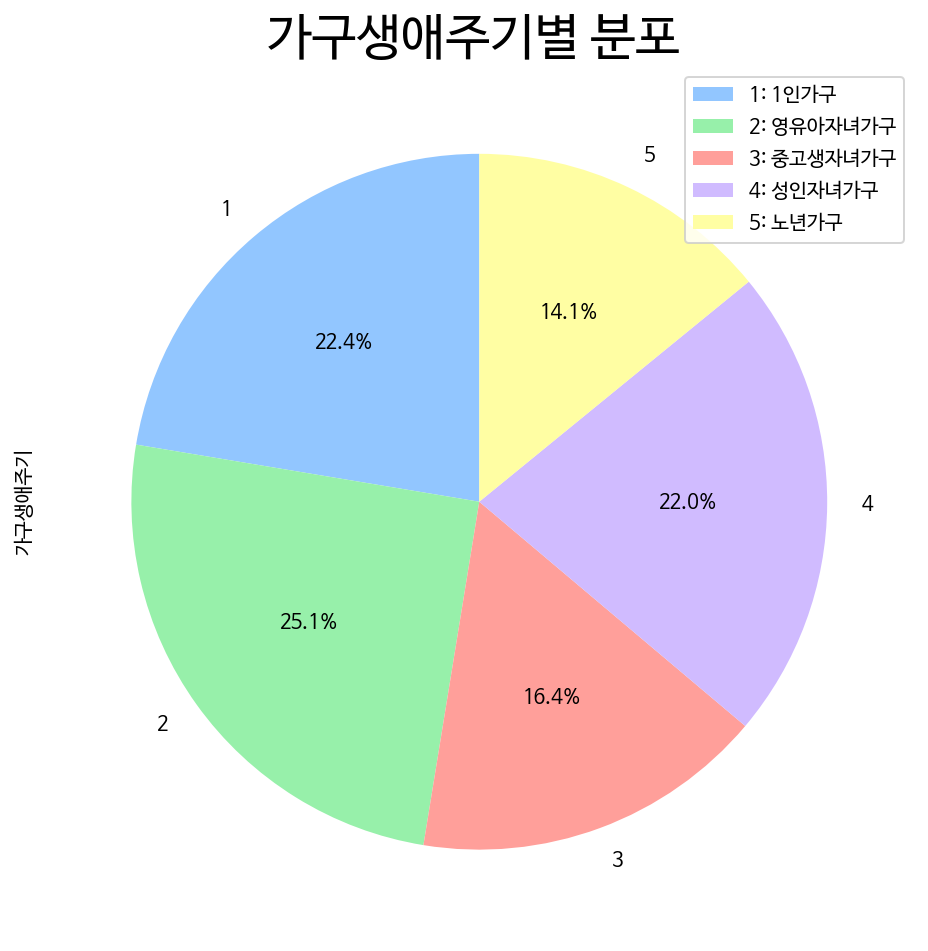

In [19]:
plt.style.use( 'seaborn-pastel')
df1_cycle.plot( kind = 'pie', figsize = (8,8), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '가구생애주기별 분포 ', size = 25 )
plt.legend(labels=('1: 1인가구', '2: 영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

### 2-4) 년,월

연월데이터 '202001'형태를 년도와 월컬럼으로 나누어 준다.

In [20]:
data['년'] = data['연월'].astype(str).str[0:4]
data['월'] = data['연월'].astype(str).str[4:6]
data.head(2)
data['년'] = data['년'].astype('int')
data['월'] = data['월'].astype('int')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   연월       int64 
 1   카드이용_시도  object
 2   업종명      object
 3   고객거주_시도  object
 4   연령대      int32 
 5   성별       int64 
 6   가구생애주기   int64 
 7   이용고객수    int64 
 8   이용금액     int64 
 9   이용건수     int64 
 10  년        int32 
 11  월        int32 
dtypes: int32(3), int64(6), object(3)
memory usage: 1.9+ GB


### 2-5) 계절

In [22]:
data['계절'] = np.nan

data['계절'][data['월'] == 1]='겨울'
data['계절'][data['월'] == 2]='겨울'
data['계절'][data['월'] == 3]='봄'
data['계절'][data['월'] == 4]='봄'
data['계절'][data['월'] == 5]='봄'
data['계절'][data['월'] == 6]='여름'
data['계절'][data['월'] == 7]='여름'
data['계절'][data['월'] == 8]='여름'
data['계절'][data['월'] == 9]='가을'
data['계절'][data['월'] == 10]='가을'
data['계절'][data['월'] == 11]='가을'
data['계절'][data['월'] == 12]='겨울'

<ipython-input-22-d24073928dc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['계절'][data['월'] == 1]='겨울'


In [23]:
data_2019 = data[data['년']==2019]
data_2019.head()

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,1,겨울
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,1,겨울
2,201901,강원,건강보조식품 소매업,강원,30,2,2,6,818700,6,2019,1,겨울
3,201901,강원,건강보조식품 소매업,강원,40,1,3,4,1717000,5,2019,1,겨울
4,201901,강원,건강보조식품 소매업,강원,40,1,4,3,1047300,3,2019,1,겨울


In [24]:
print("2019년 합 : " + str(len(data_2019)))
print("2020년 합 : " + str(len(data)-len(data_2019)))
print("전체 데이터 합 : " + str(len(data)))

2019년 합 : 20425415
2020년 합 : 4272377
전체 데이터 합 : 24697792


In [25]:
season_1 =data_2019['계절']=='겨울'
season_2 =data_2019['계절']=='봄'
season_3 =data_2019['계절']=='여름'
season_4 =data_2019['계절']=='가을'
print('겨울 행의갯수:',np.sum(season_1)) 
print('봄 행의갯수:',np.sum(season_2)) 
print('여름 행의갯수:',np.sum(season_3))
print('가을 행의갯수:',np.sum(season_4))

겨울 행의갯수: 4875679
봄 행의갯수: 5096567
여름 행의갯수: 5314345
가을 행의갯수: 5138824


In [26]:
data_2019_vis = data_2019.groupby(['계절'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

In [27]:
data_2019_vis=data_2019_vis.reindex([2,3,0,1])

겨울,봄,여름,가을의 행의개수가 다르기 때문에 sum이 아닌 mean을 이용해 group을 지어준다.

Text(0.5, 1.0, '계절별 이용고객수')

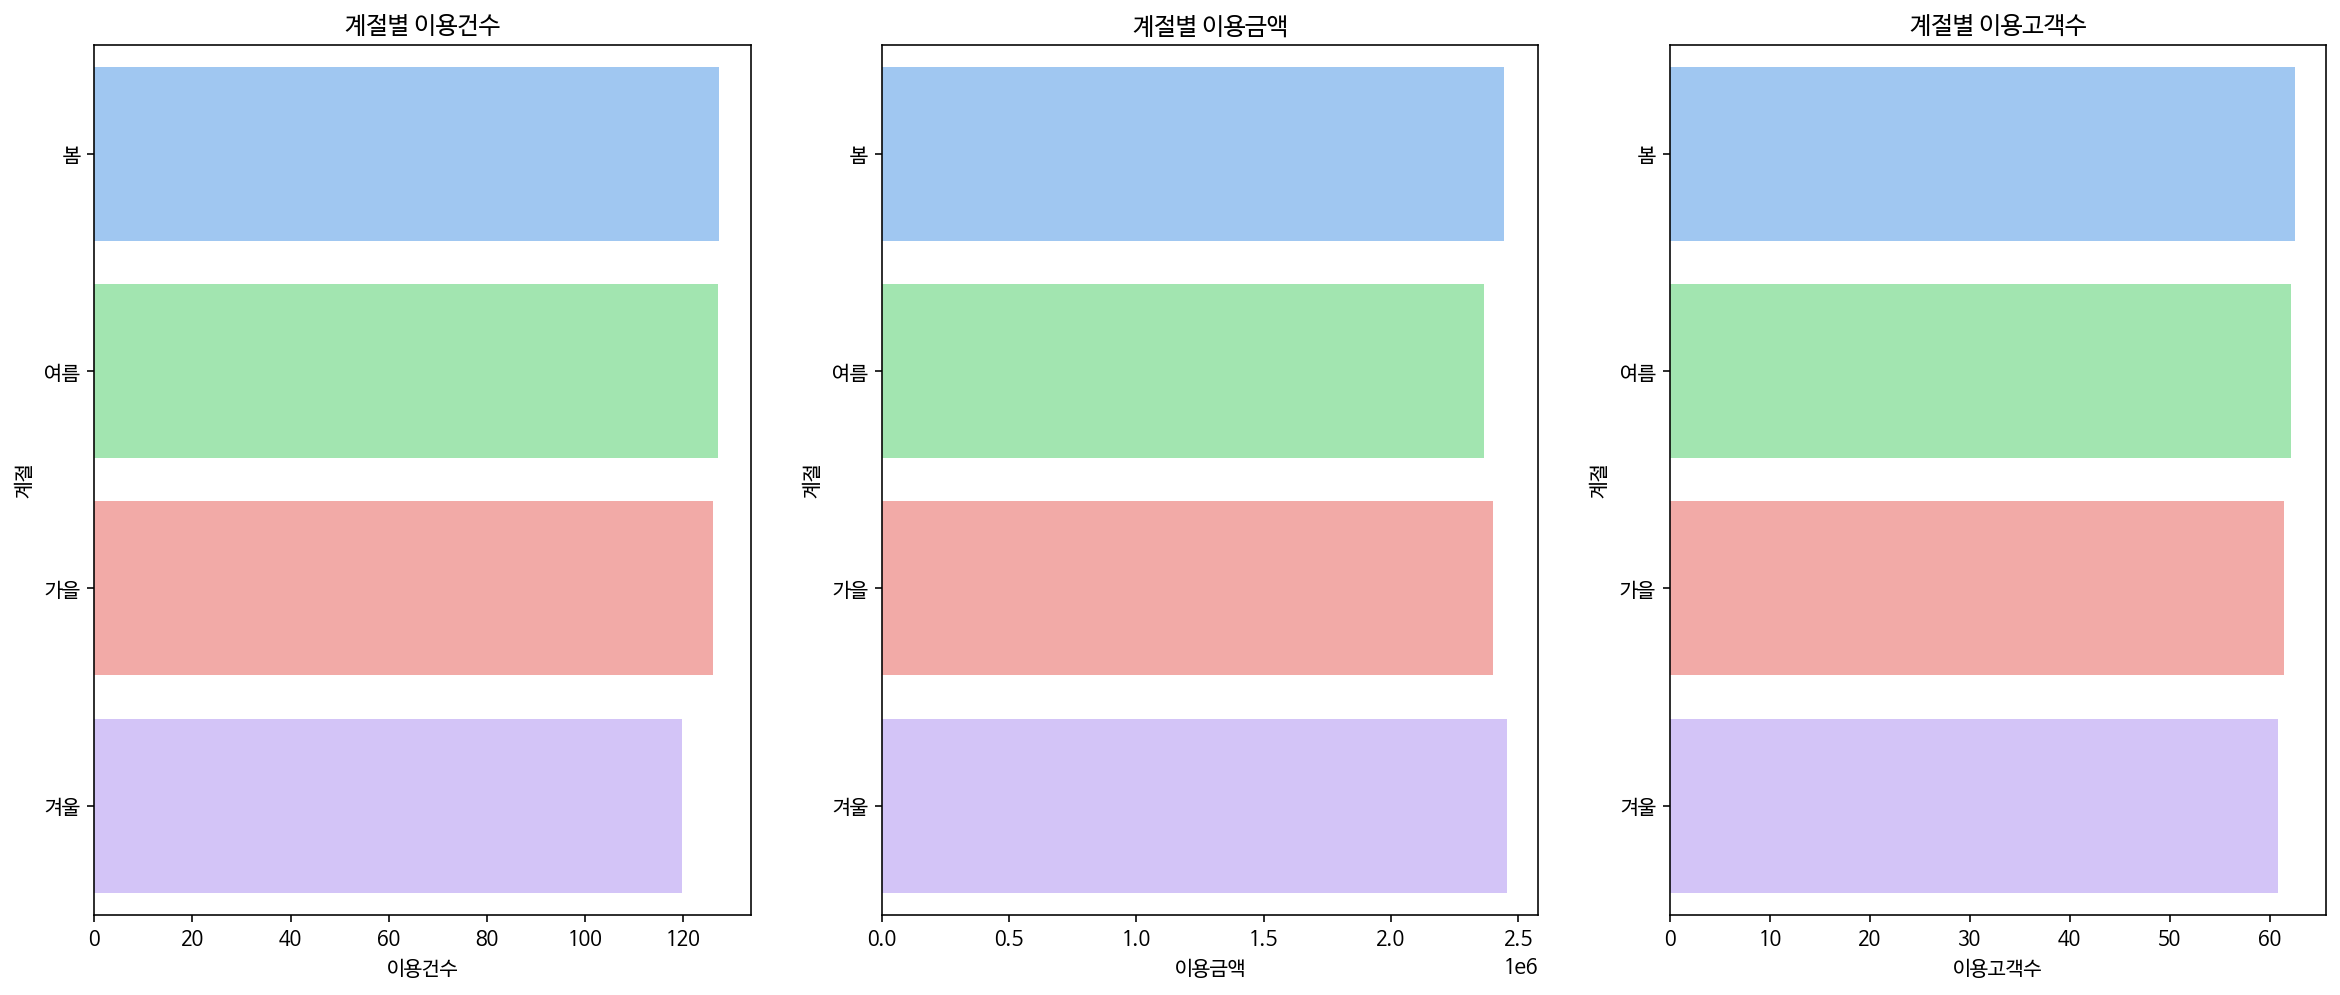

In [28]:
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=3,squeeze=False)
sns.barplot(x = data_2019_vis['이용건수'],y=data_2019_vis['계절'],ci=None, ax=axes[0][0]).set_title('계절별 이용건수')
sns.barplot(x = data_2019_vis['이용금액'],y=data_2019_vis['계절'],ci=None, ax=axes[0][1]).set_title('계절별 이용금액')
sns.barplot(x = data_2019_vis['이용고객수'],y=data_2019_vis['계절'],ci=None, ax=axes[0][2]).set_title('계절별 이용고객수')

#plt.savefig('correlation analysis.jpg')

계절별로 카드이용에 큰 차이는 보이지 않는다.\
계절별 업종에 차이가 있는지 확인해보자

In [29]:
data_2019_vis1 = data_2019.groupby(['계절','업종명'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

Text(0.5, 1.0, '봄 상위 5개 업종')

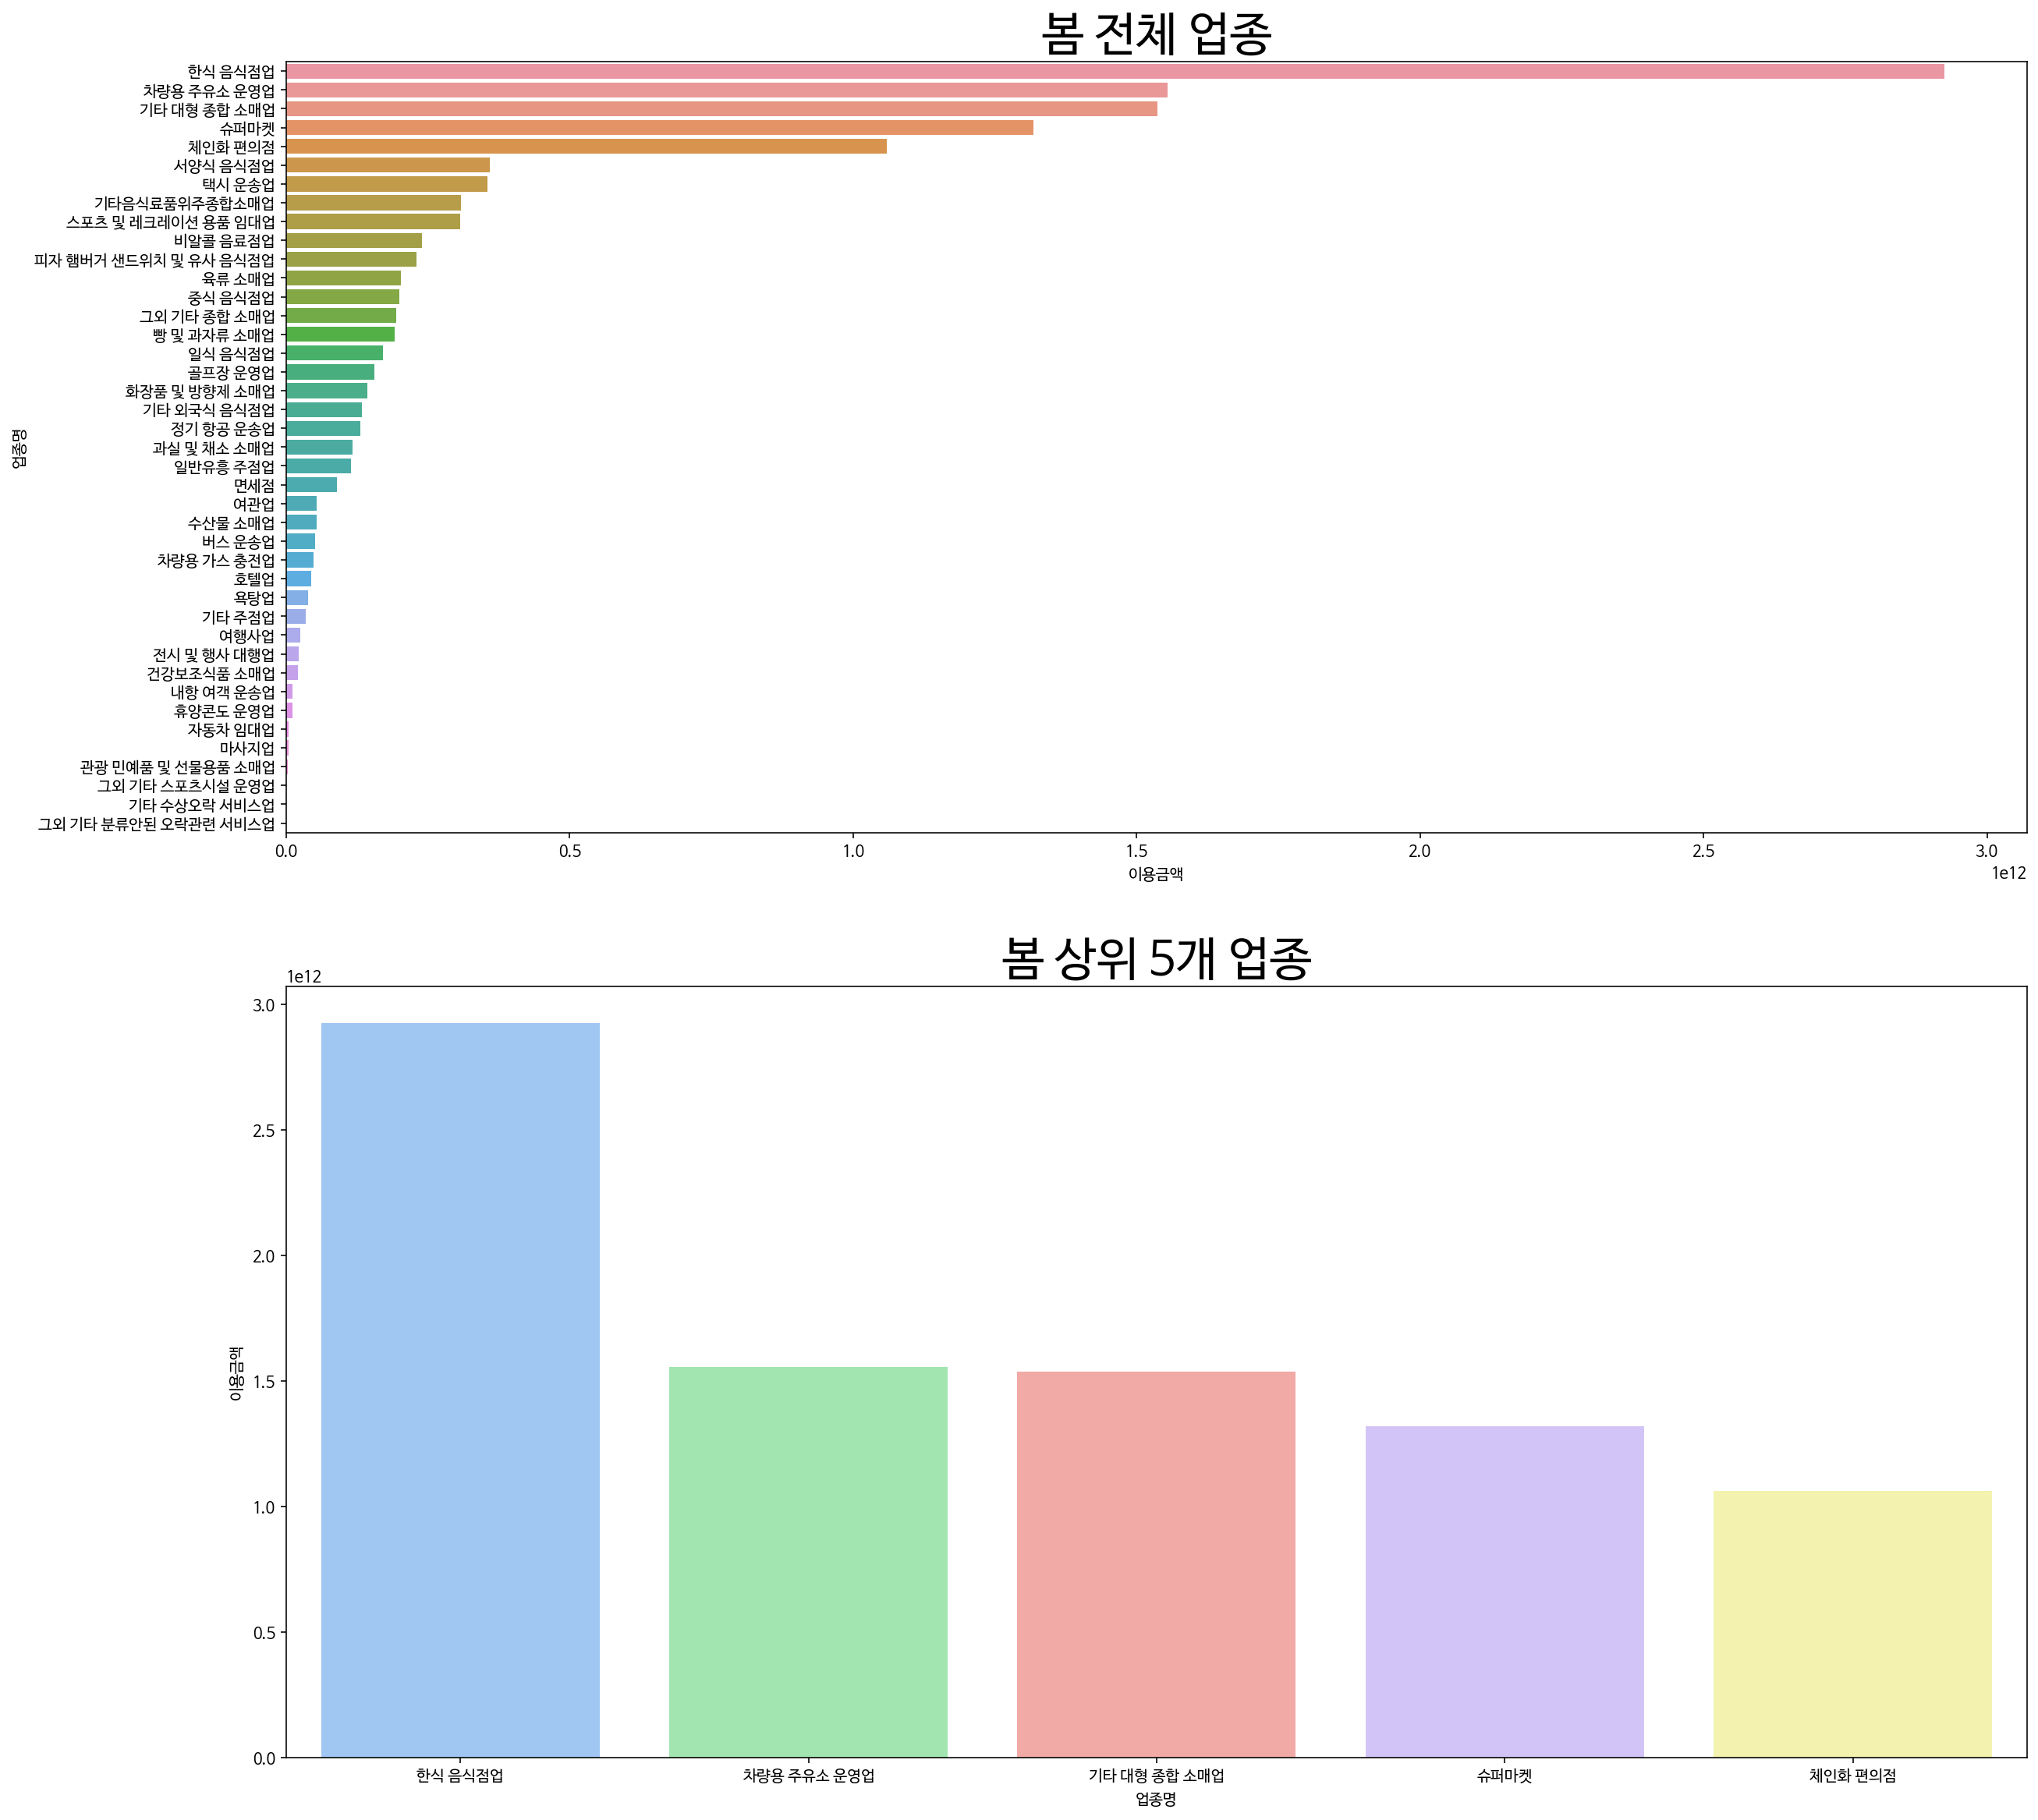

In [30]:
where=data_2019[data_2019['계절']=='봄']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('봄 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('봄 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다

Text(0.5, 1.0, '여름 상위 5개 업종')

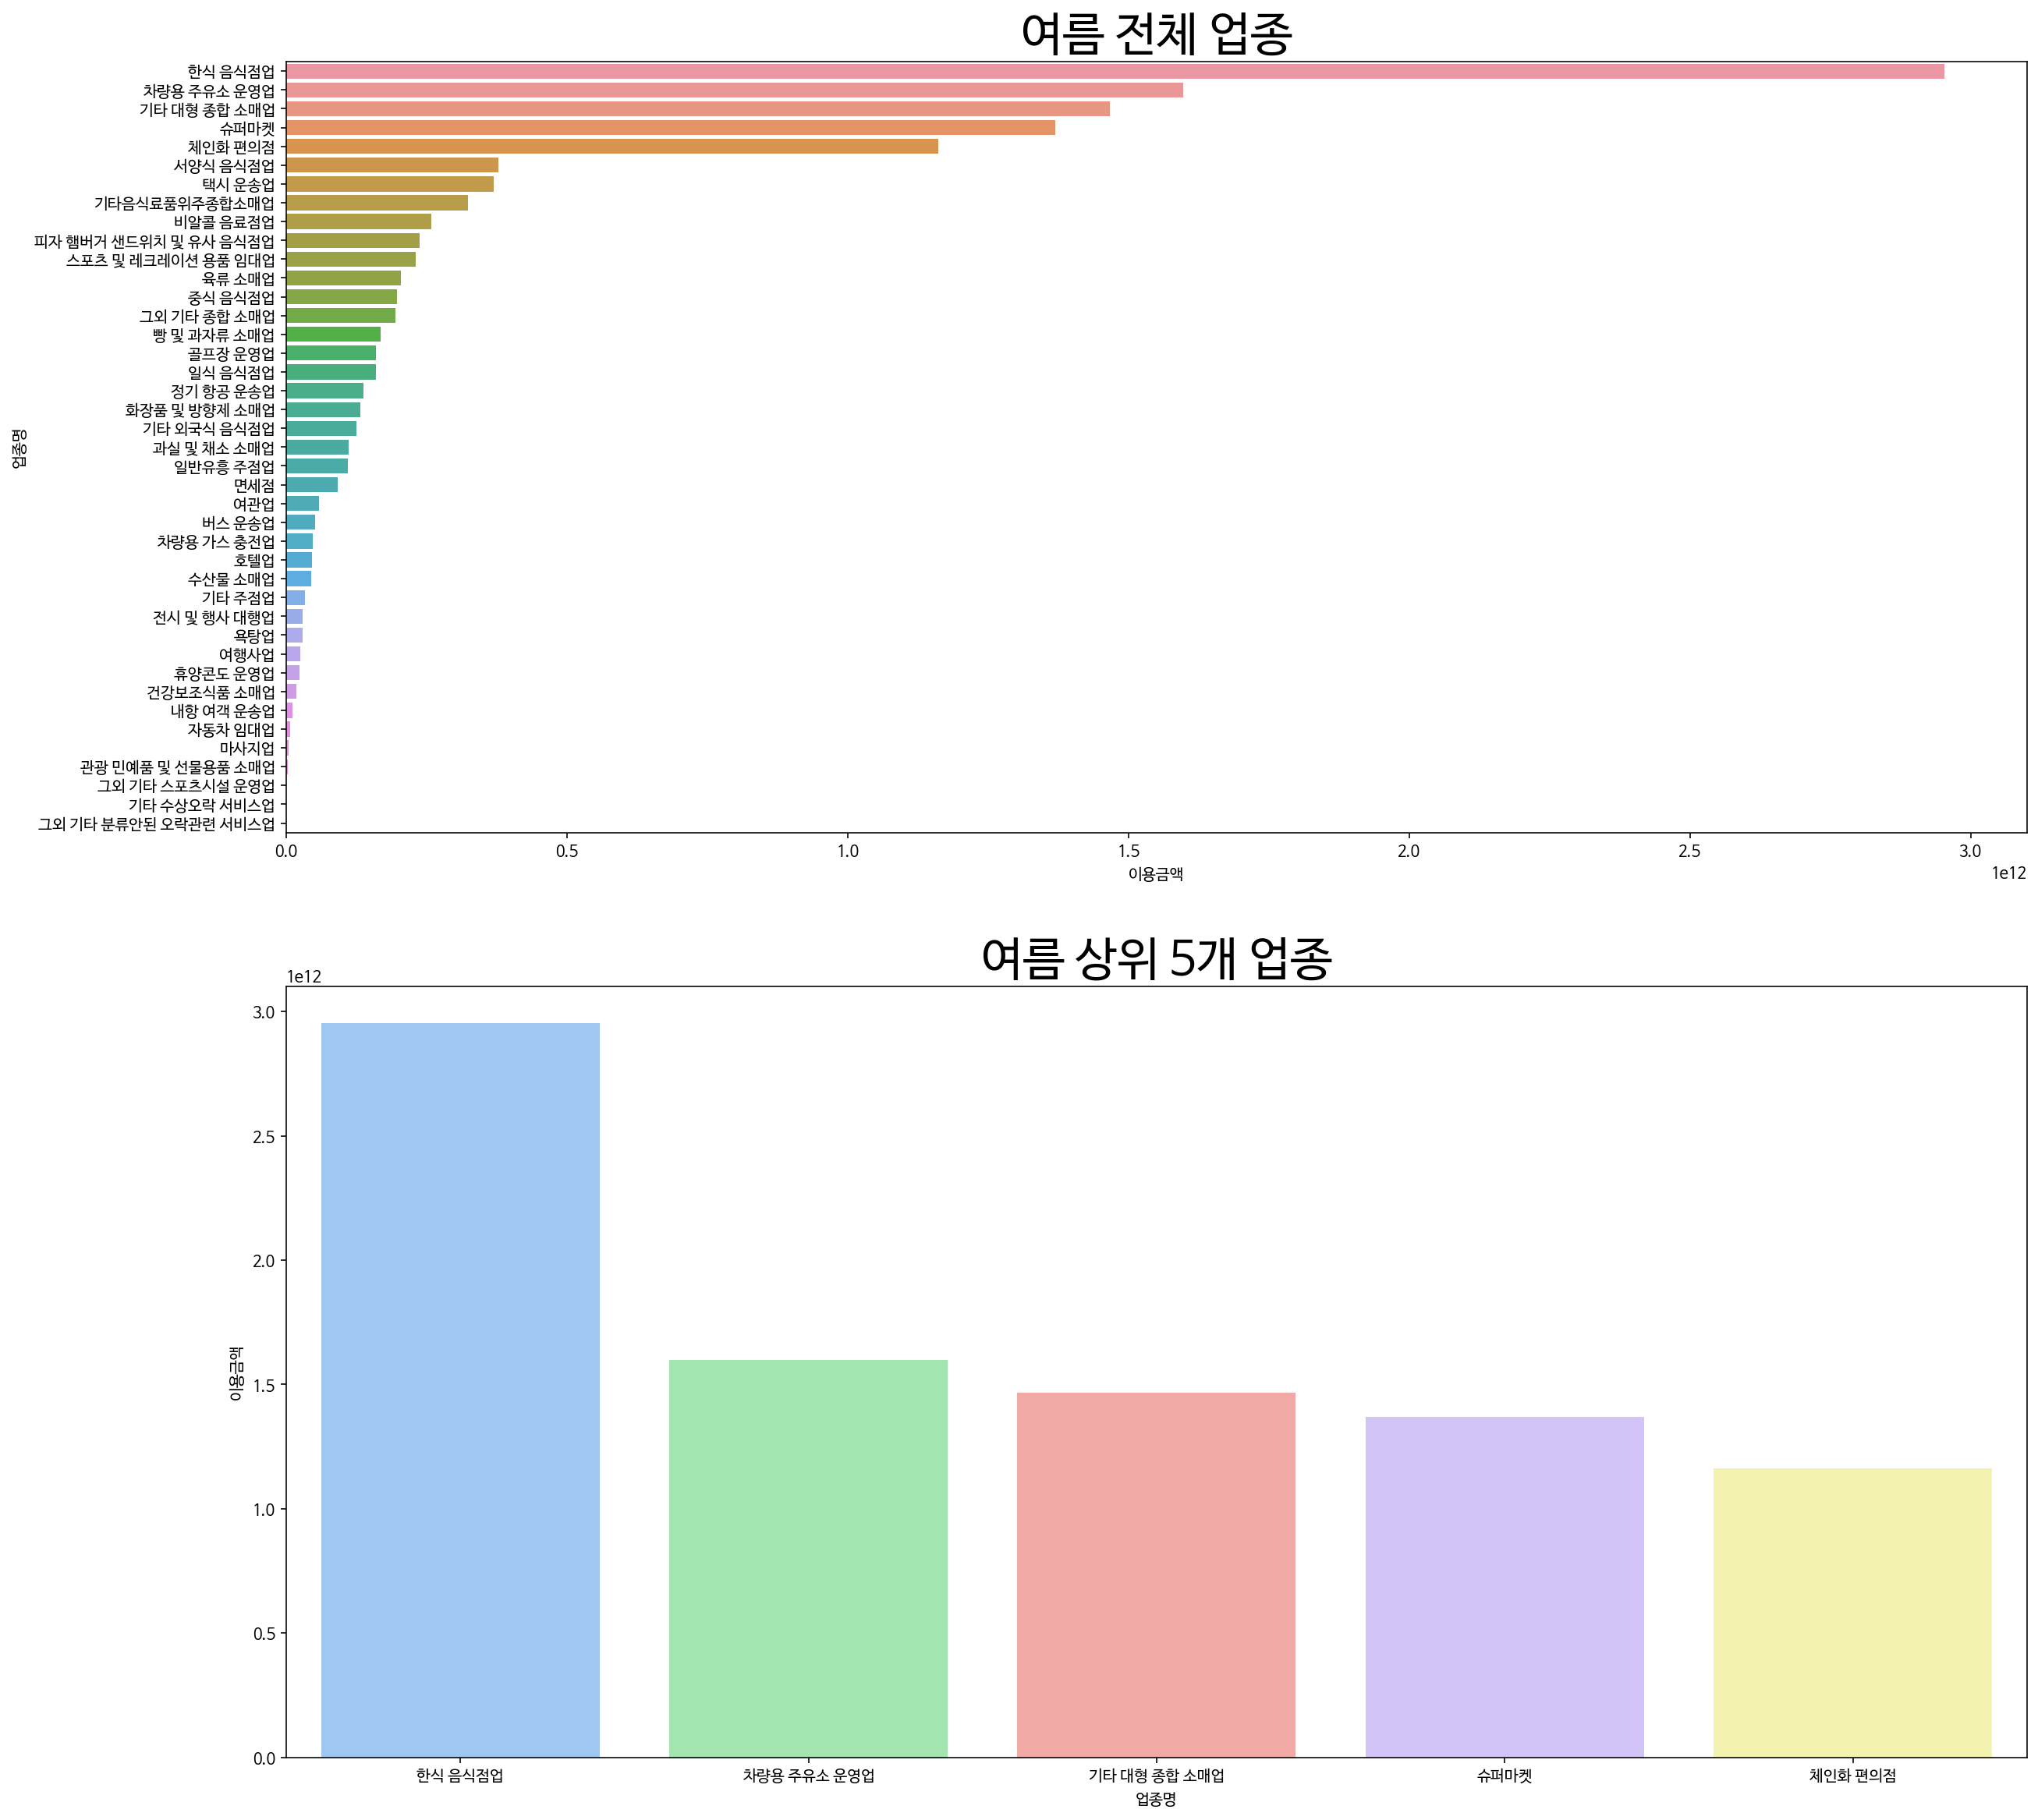

In [31]:
where=data_2019[data_2019['계절']=='여름']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('여름 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('여름 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다.

Text(0.5, 1.0, '가을 상위 5개 업종')

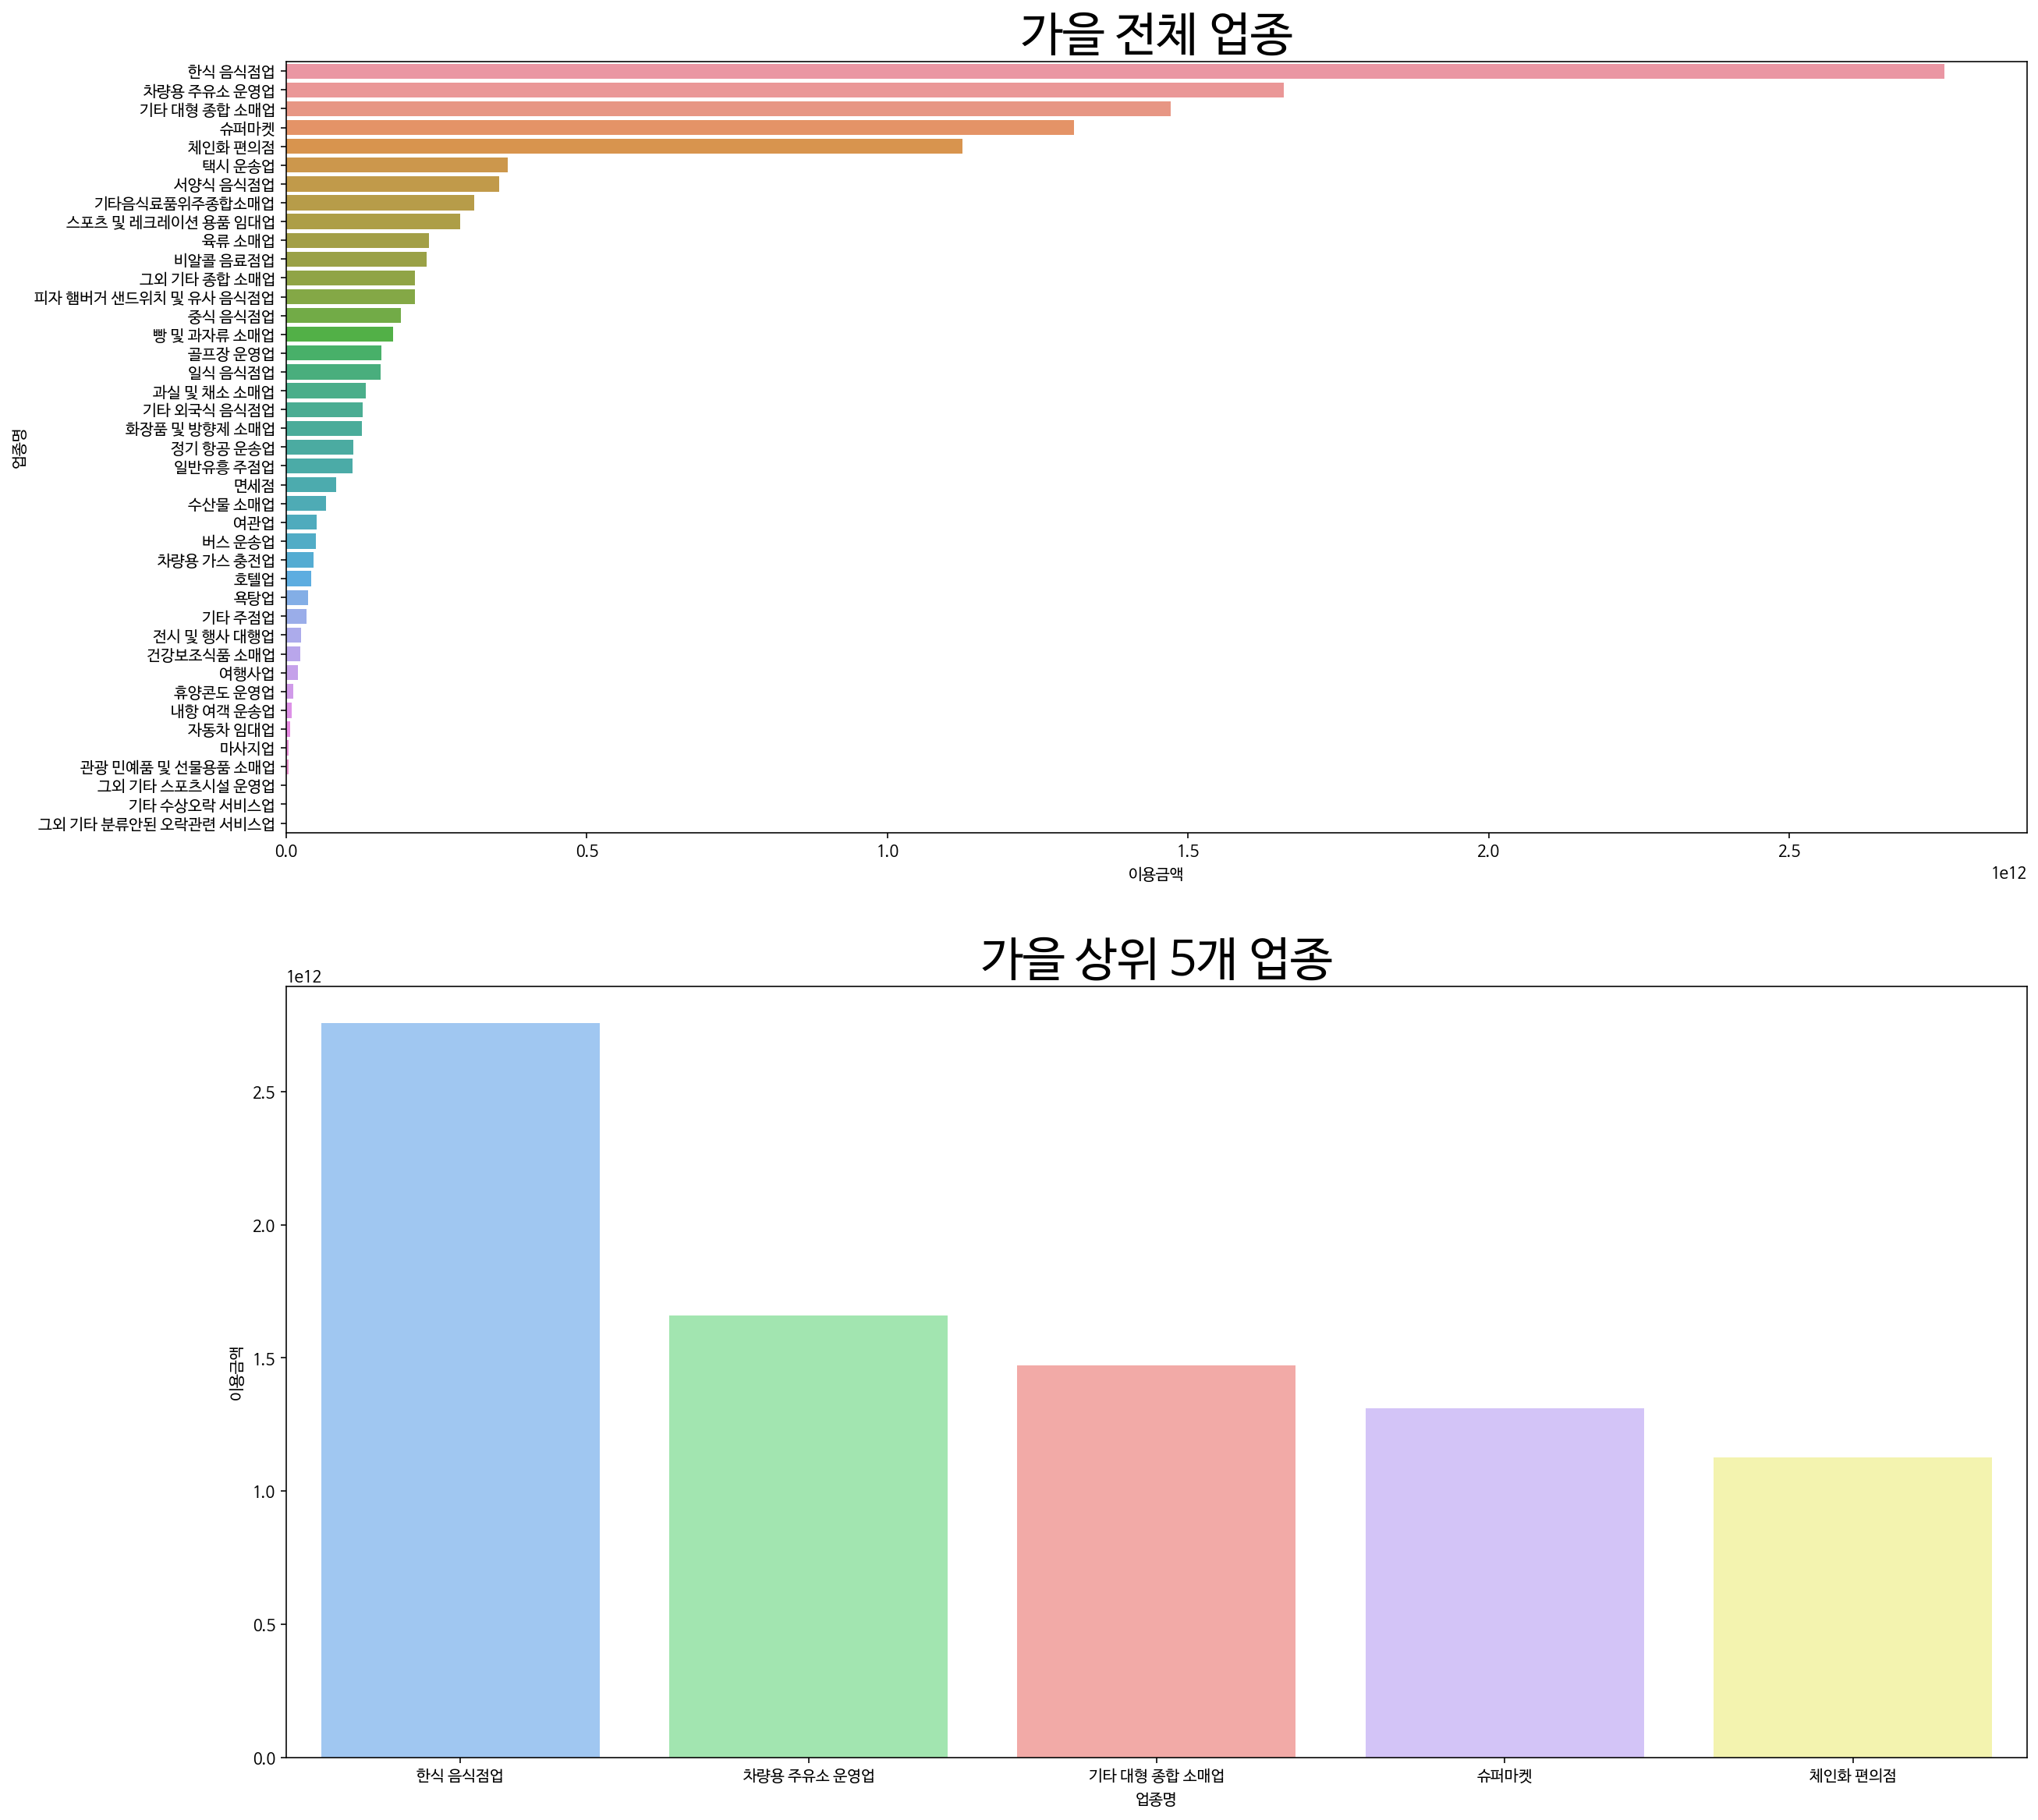

In [32]:
where=data_2019[data_2019['계절']=='가을']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('가을 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('가을 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다.

Text(0.5, 1.0, '겨울 상위 5개 업종')

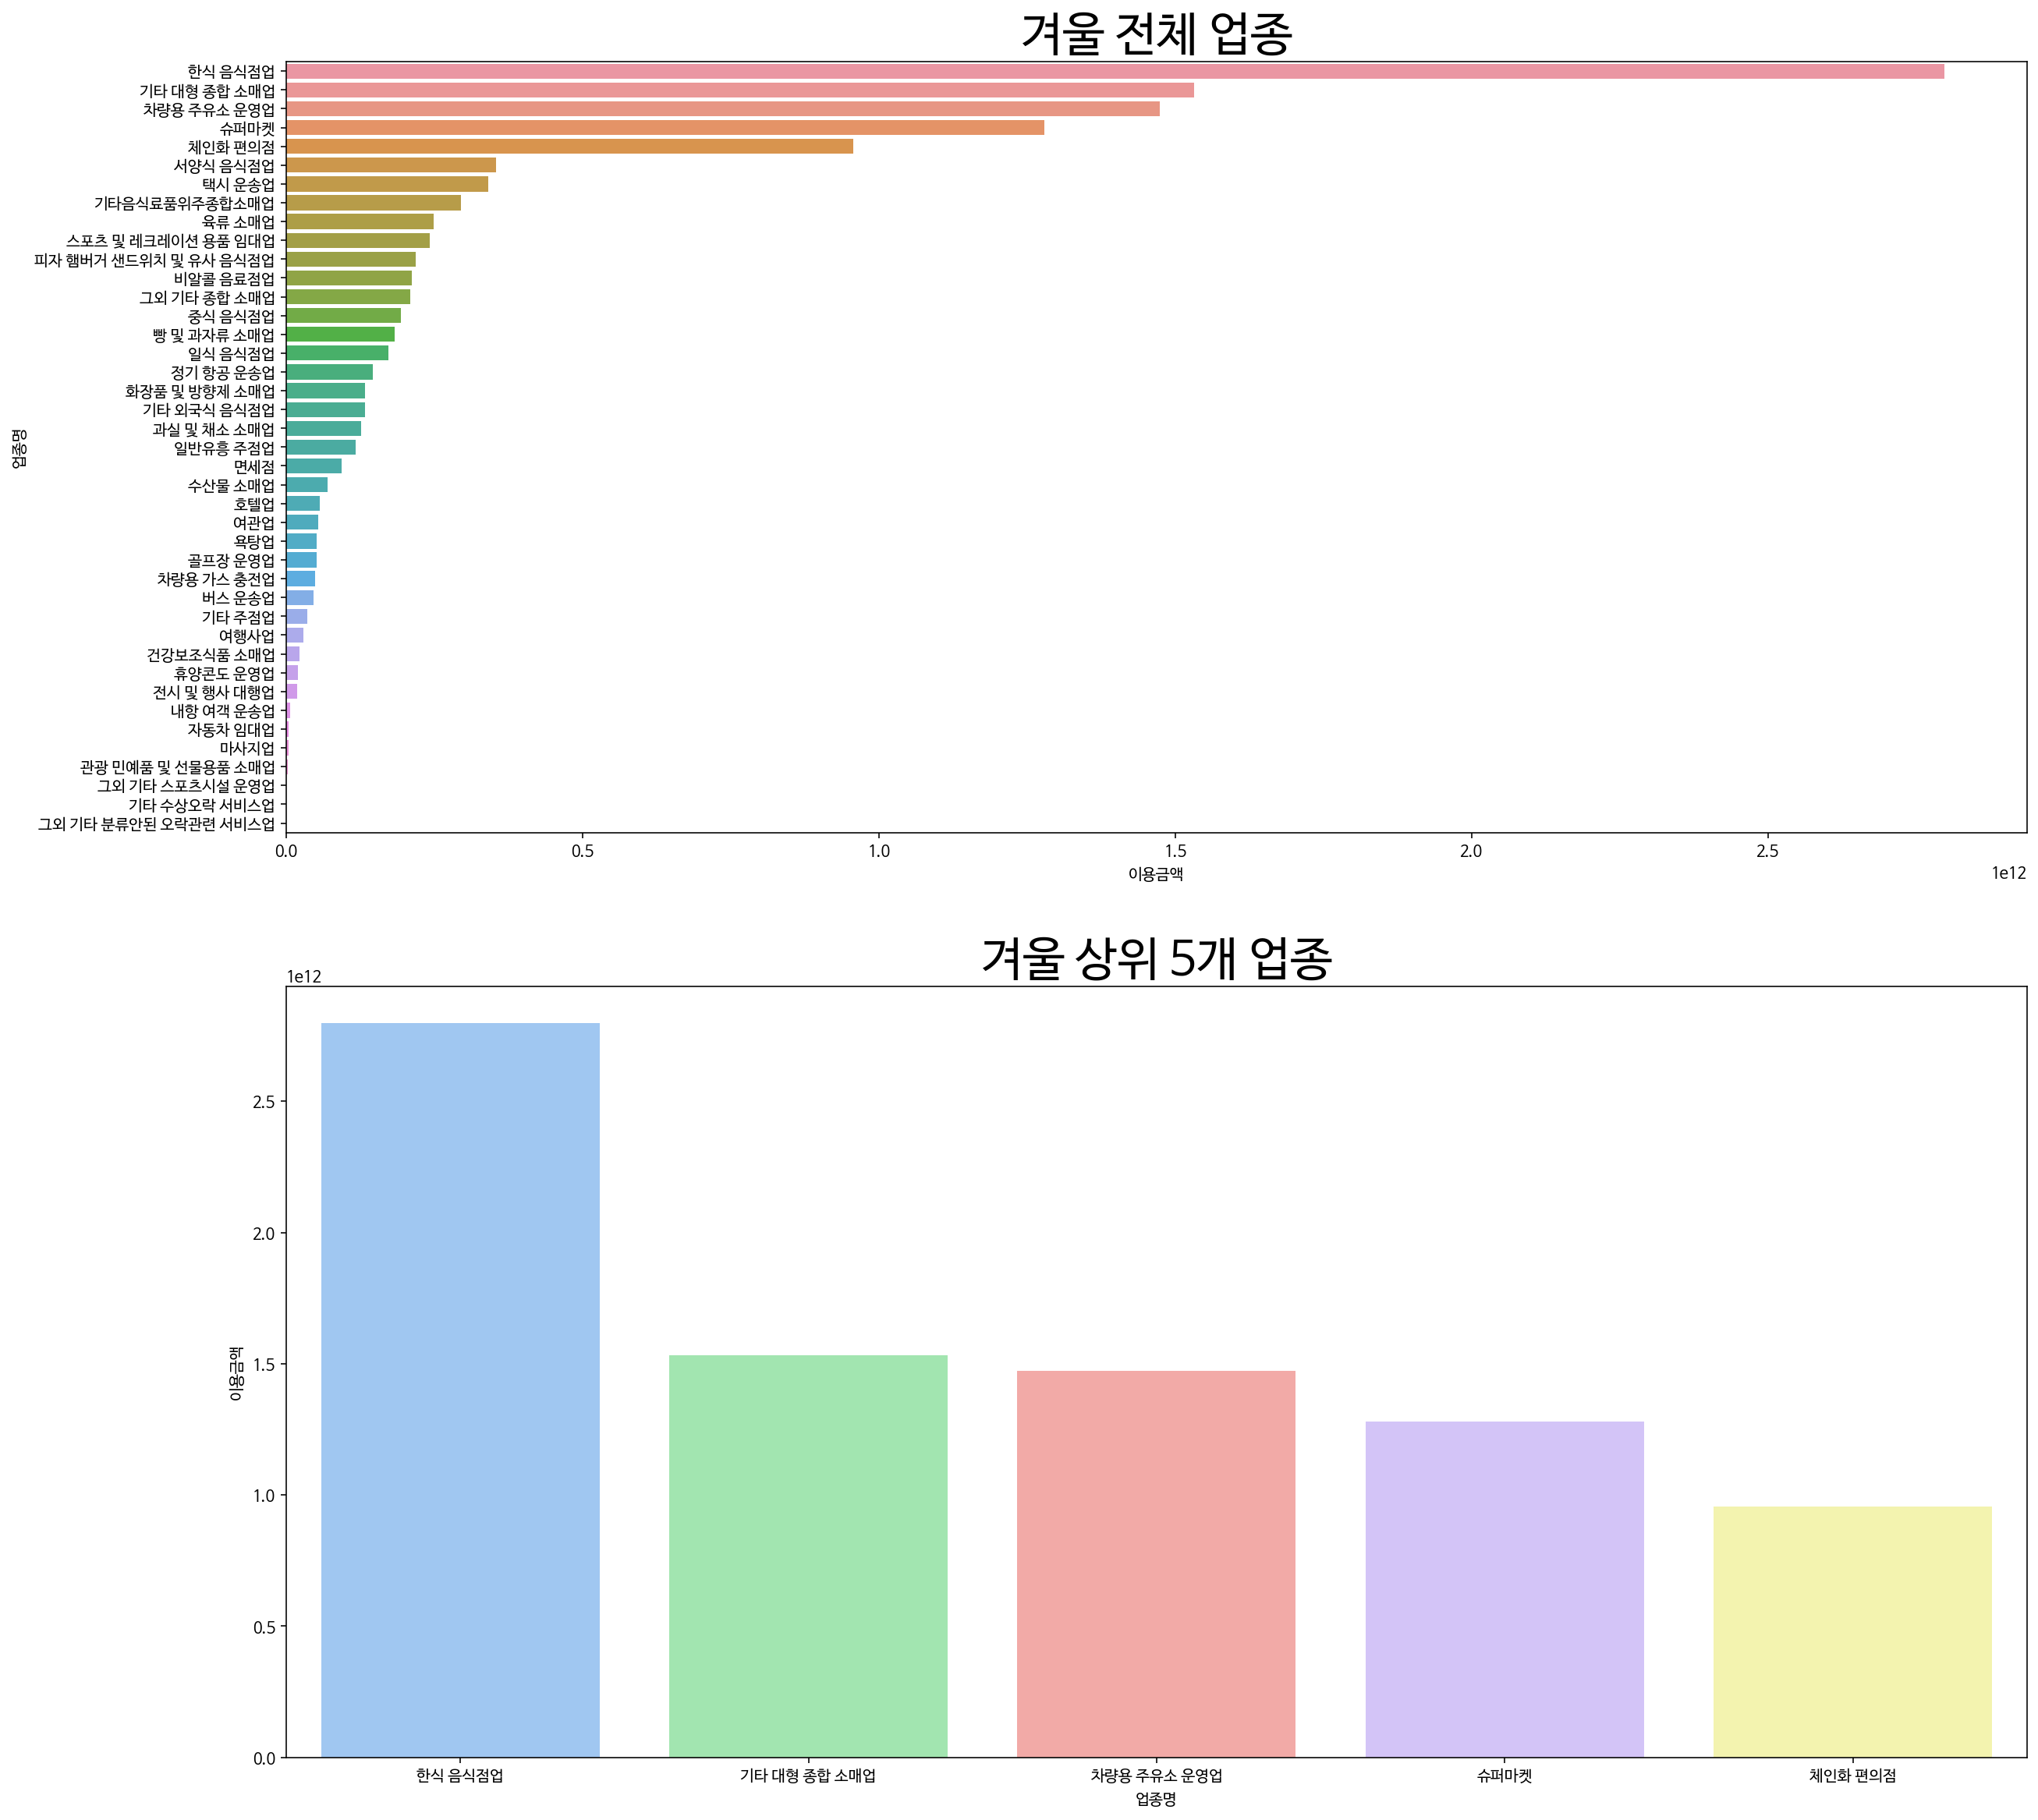

In [33]:
where=data_2019[data_2019['계절']=='겨울']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('겨울 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('겨울 상위 5개 업종',size=30)

In [34]:
data['계절1']=data['계절']
data.계절1 = data.계절1.replace('봄', 1)
data.계절1 = data.계절1.replace('여름', 2)
data.계절1 = data.계절1.replace('가을', 3)
data.계절1 = data.계절1.replace('겨울', 4)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다

계절과 카드 이용은 큰 관계가 없다.

### 2-6 카드이용_시도, 고객거주_시도

In [35]:
print( data.카드이용_시도.unique() )
df1_card_sido= pd.DataFrame( data.카드이용_시도.value_counts().sort_index(ascending=True)  )

print( data.고객거주_시도.unique() )
df1_sido= pd.DataFrame( data.고객거주_시도.value_counts().sort_index(ascending=True)  )

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']


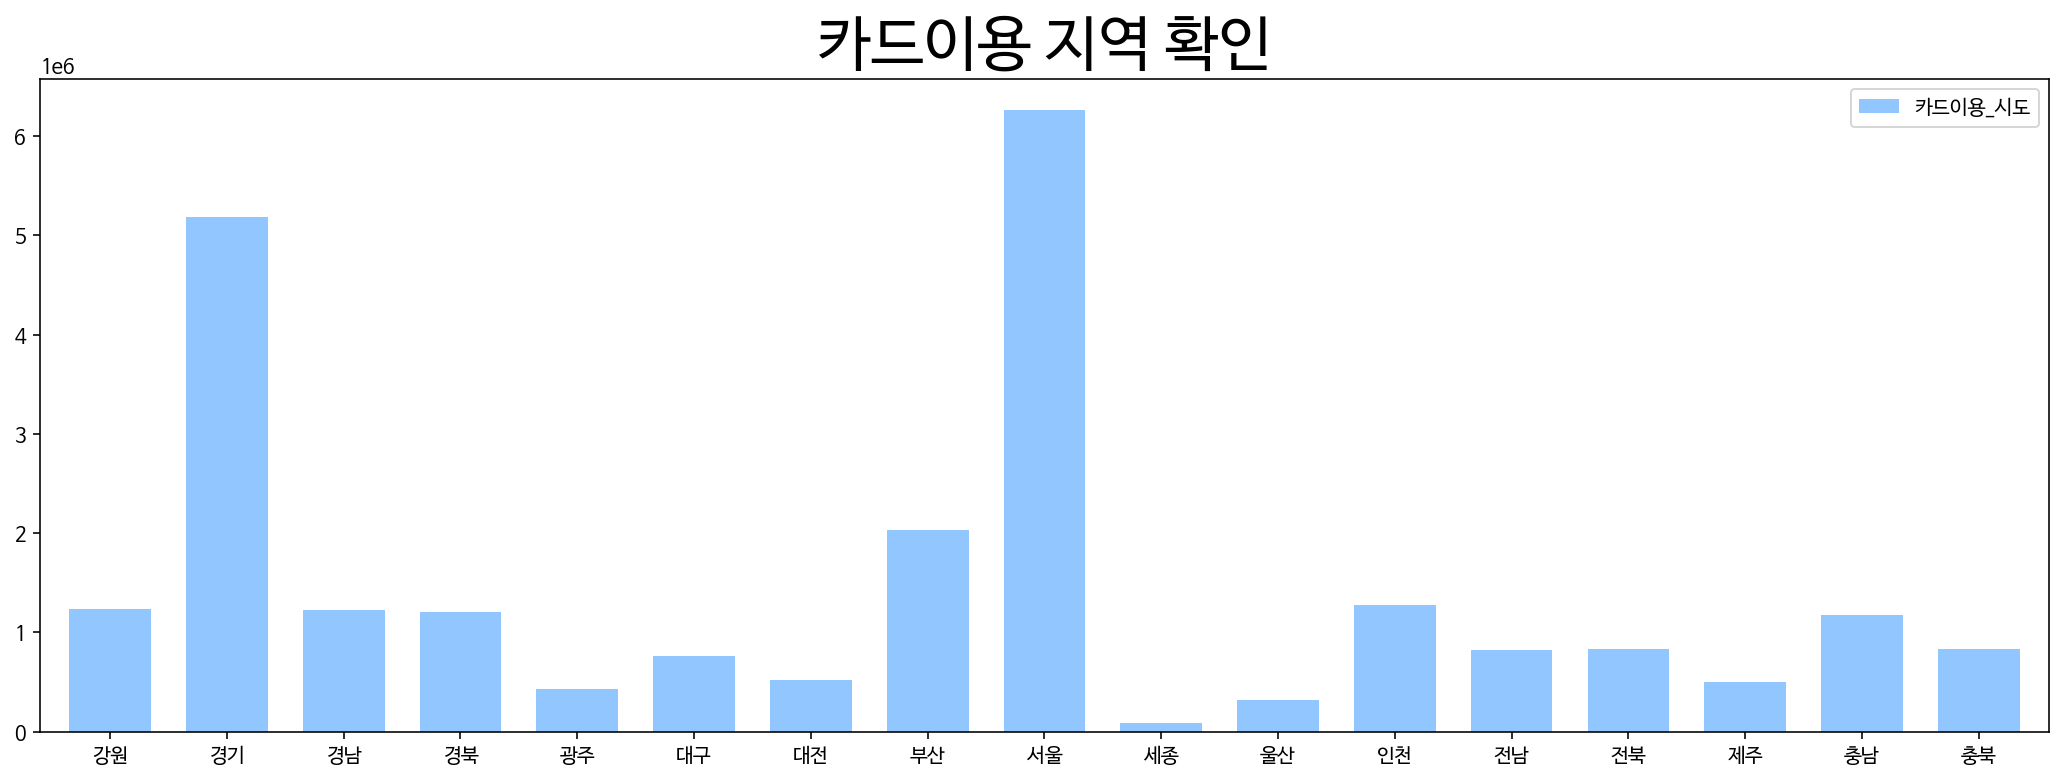

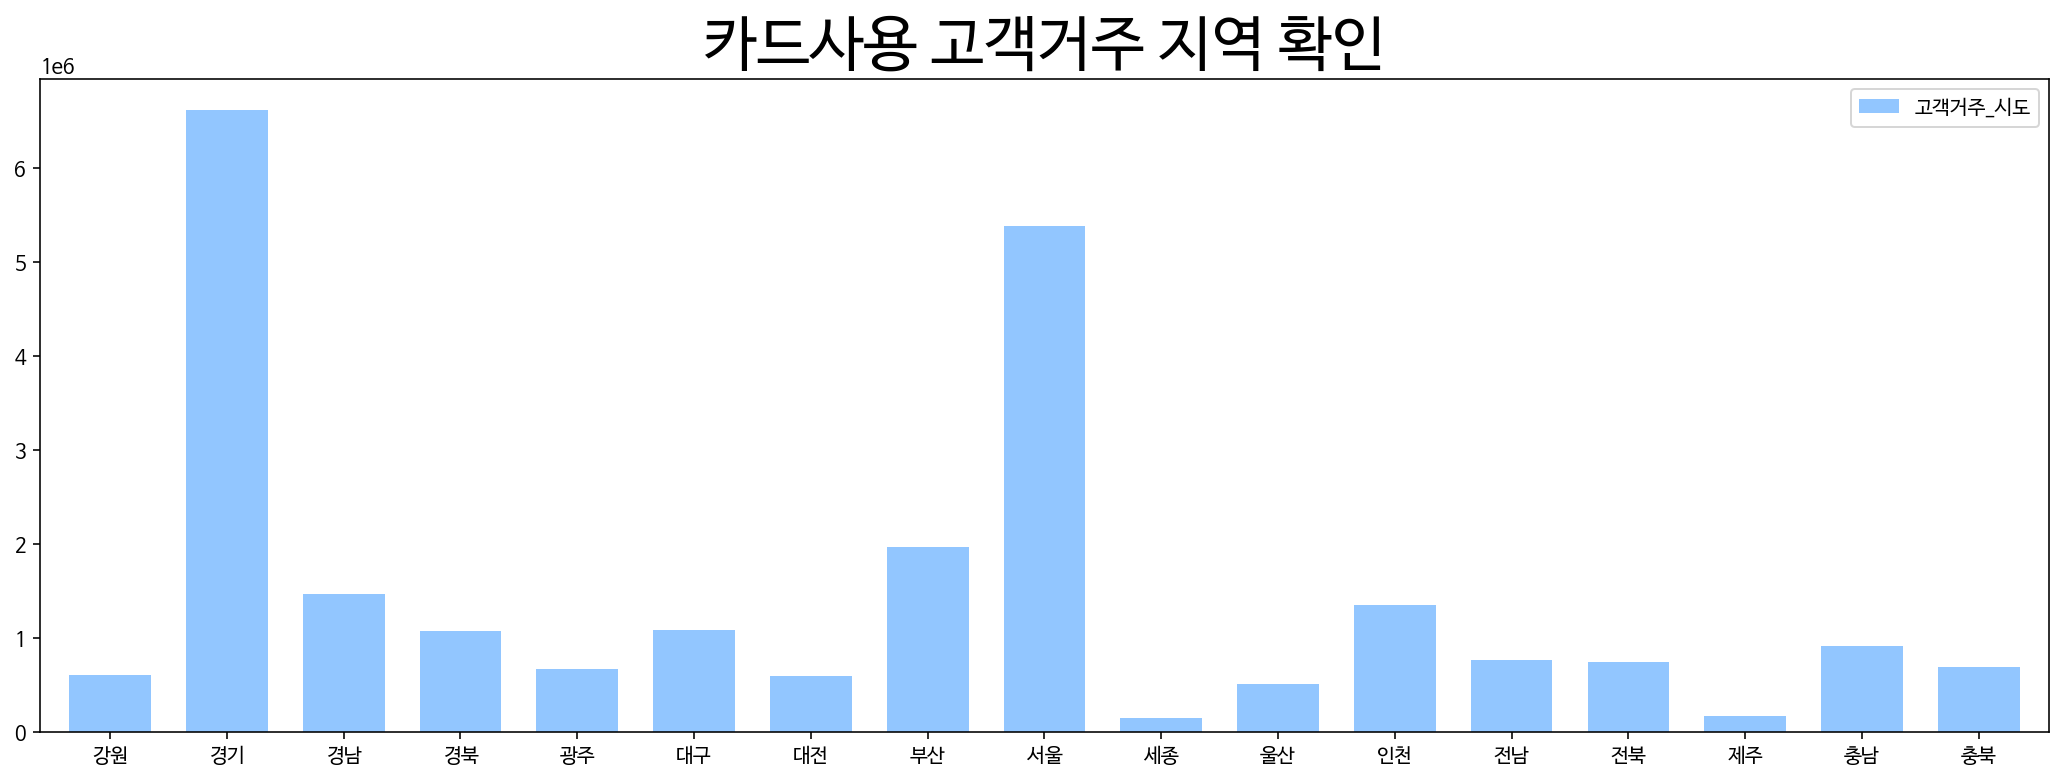

In [36]:
plt.style.use( 'seaborn-pastel' )
df1_card_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드이용 지역 확인', size = 30 )
plt.show()

plt.style.use( 'seaborn-pastel' )
df1_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드사용 고객거주 지역 확인', size = 30 )
plt.show()

서울 지역이 카드 사용량이 가장 많다. 하지만 사용자의 거주지중 가장 많은 지역은 경기이다.\
제주지역은 여행객이 많을 것으로 보인다. 그래서 거주지역과 카드사용지역이 다른 행을 뽑아봤따

In [37]:
ano=data[data['고객거주_시도']!=data['카드이용_시도']]
ano_1= ano.groupby(['카드이용_시도','고객거주_시도'])[['이용금액']].sum().reset_index()

In [38]:
ano_2= ano_1.groupby(['카드이용_시도'])[['이용금액']].sum().reset_index()
ano_3= ano_1.groupby(['고객거주_시도'])[['이용금액']].sum().reset_index()

Text(0.5, 1.0, '고객거주_시도')

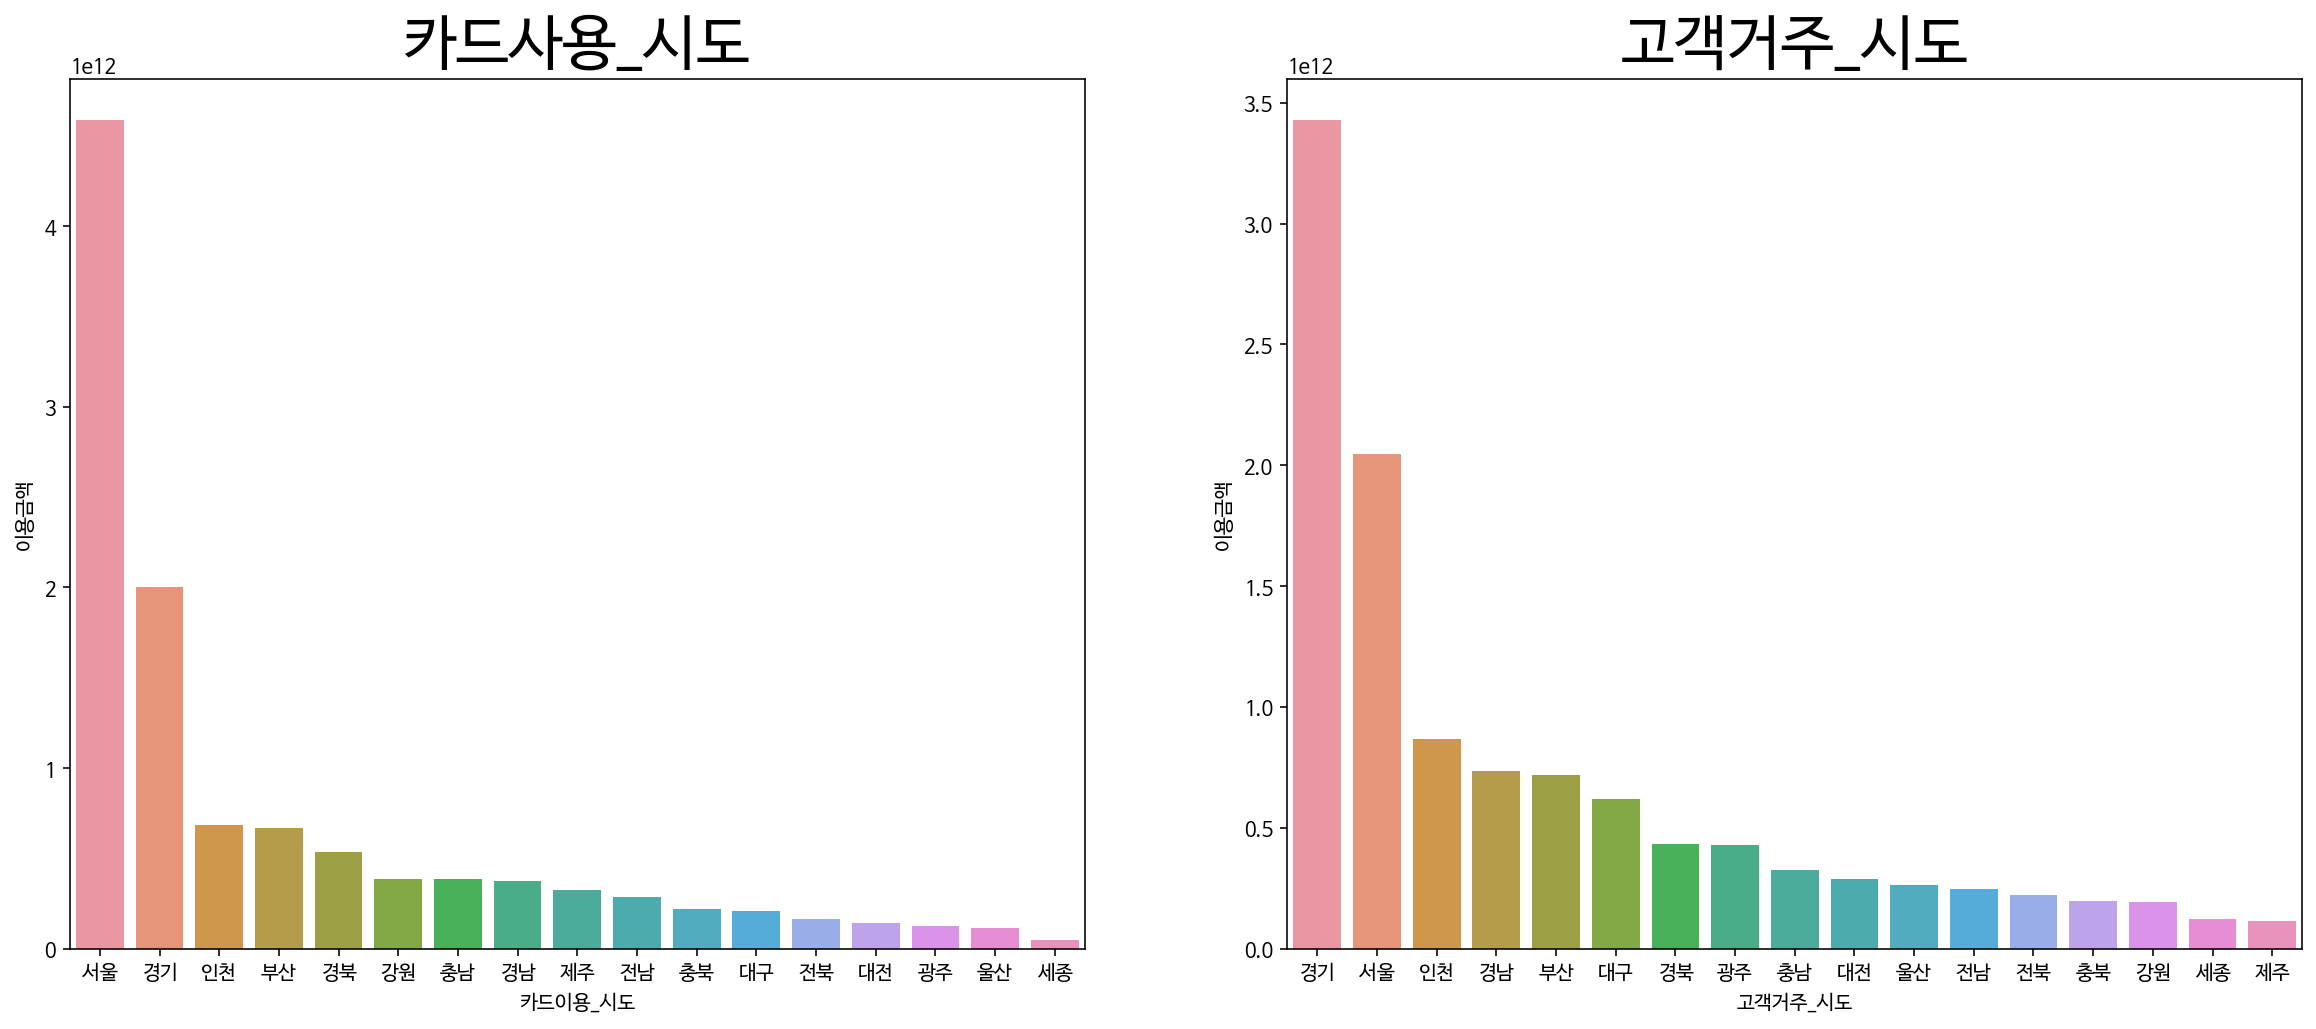

In [39]:
ano_2=ano_2.sort_values(by='이용금액',ascending=False)
ano_3=ano_3.sort_values(by='이용금액',ascending=False)
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=2,squeeze=False)
sns.barplot(x=ano_2['카드이용_시도'],y=ano_2['이용금액'], ci=None, ax=axes[0][0]).set_title('카드사용_시도',size=30)
sns.barplot(x=ano_3['고객거주_시도'],y =ano_3['이용금액'], ci=None,ax=axes[0][1]).set_title('고객거주_시도',size=30)

이렇게 이용금액이나 이용건수를 기준으로 나눴을 때 다른 지역에 가장 돈을 많이 쓰는  지역은 경기임을 알수 있다.\
그래서 경기도 사람들은 어느지역에 돈을 많이 쓰는지 확인해볼 것이다.

In [40]:
ano_4=ano[ano['고객거주_시도']=='경기']
ano_4= ano_4.groupby(['카드이용_시도'])[['이용금액']].sum().reset_index()
ano_4=ano_4.sort_values(by='이용금액',ascending=False)

Text(0.5, 1.0, '경기지역사람들의 소비지역')

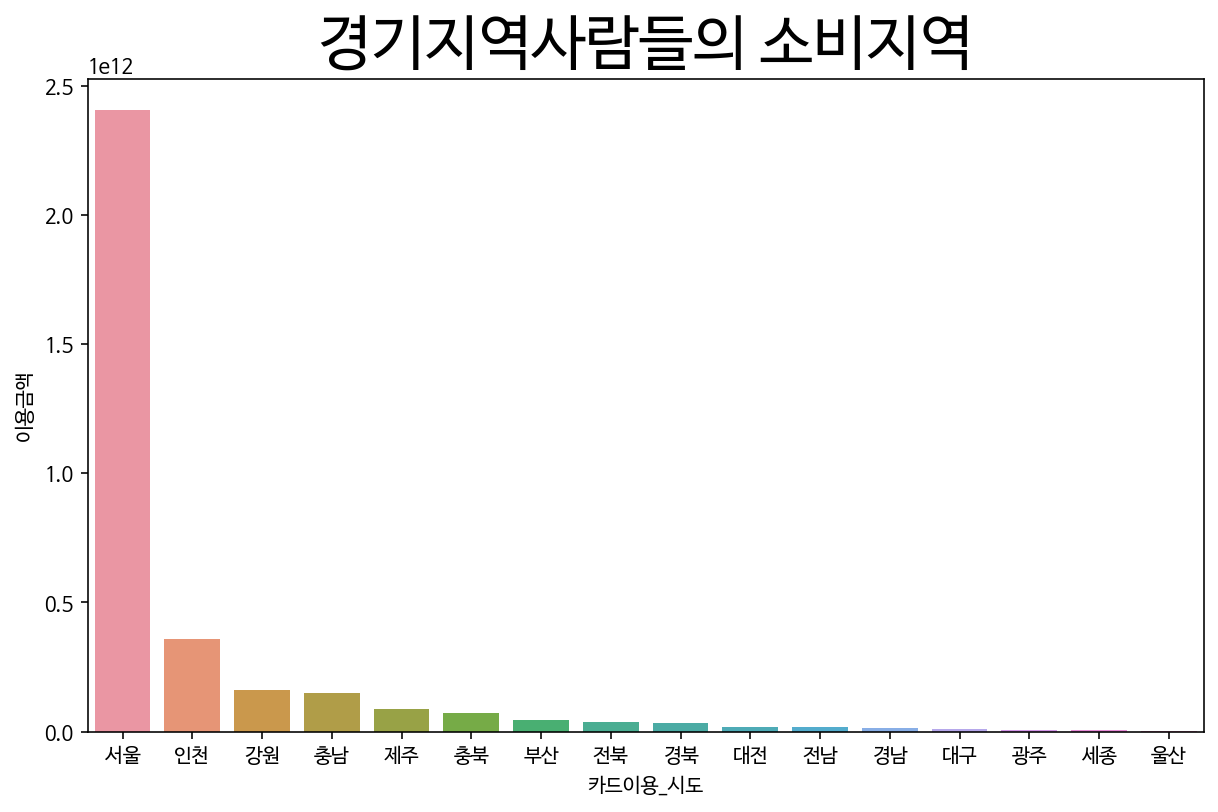

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(y =ano_4['이용금액'], x = ano_4['카드이용_시도'],ci=None).set_title('경기지역사람들의 소비지역',size=30)

경기지역의 사람들은 서울에서 사용한 금액이 가장 많은것을 볼 수 있다. 

In [42]:
data['카드이용_시도1']=data['카드이용_시도']
data['카드이용_시도1'] = data['카드이용_시도1'].replace('강원', 1)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('경기', 2)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('경남', 3)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('경북', 4)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('광주', 5)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('대구', 6)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('대전', 7)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('부산', 8)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('서울', 9)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('세종', 10)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('울산', 11)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('인천', 12)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('전남', 13)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('전북', 14)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('제주', 15)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('충남', 16)
data['카드이용_시도1'] = data['카드이용_시도1'].replace('충북', 17)

In [43]:
data['카드이용_시도'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

### 2-7) 업종명

In [44]:
data['업종명1'] = data['업종명']
len(data.업종명.value_counts().sort_index().index)

41

In [45]:
for i in range(len(data.업종명.value_counts().sort_index().index)) :
    data.업종명1 = data.업종명1.replace(data.업종명.value_counts().sort_index().index[i],i+1)

# 3. Making Dataset for Model

In [46]:
data.head()

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절,계절1,카드이용_시도1,업종명1
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,1,겨울,4,1,1
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,1,겨울,4,1,1
2,201901,강원,건강보조식품 소매업,강원,30,2,2,6,818700,6,2019,1,겨울,4,1,1
3,201901,강원,건강보조식품 소매업,강원,40,1,3,4,1717000,5,2019,1,겨울,4,1,1
4,201901,강원,건강보조식품 소매업,강원,40,1,4,3,1047300,3,2019,1,겨울,4,1,1


In [47]:
df=pd.DataFrame()
df['연월'] = data['연월']
df['연령대'] = data['연령대']
df['성별'] = data['성별']
df['가구생애주기'] = data['가구생애주기']
df['카드이용_시도1']= data['카드이용_시도1']
df['업종명1'] = data['업종명1']
df['계절1'] = data['계절1']
df['년'] = data['년']
df['월'] = data['월']
df['이용고객수'] =data['이용고객수']
df['이용건수'] = data['이용건수']
df['이용금액'] = data['이용금액']

In [48]:
df

,연월,연령대,성별,가구생애주기,카드이용_시도1,업종명1,계절1,년,월,이용고객수,이용건수,이용금액
0,201901,20,1,1,1,1,4,2019,1,4,4,311200
1,201901,30,1,2,1,1,4,2019,1,7,8,1374500
2,201901,30,2,2,1,1,4,2019,1,6,6,818700
3,201901,40,1,3,1,1,4,2019,1,4,5,1717000
4,201901,40,1,4,1,1,4,2019,1,3,3,1047300
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,30,1,2,17,41,1,2020,3,3,4,43300
24697788,202003,40,1,3,17,41,1,2020,3,3,3,35000
24697789,202003,50,1,4,17,41,1,2020,3,4,6,188000
24697790,202003,50,2,4,17,41,1,2020,3,4,6,99000


In [49]:
df.to_csv('modeling.csv')

C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


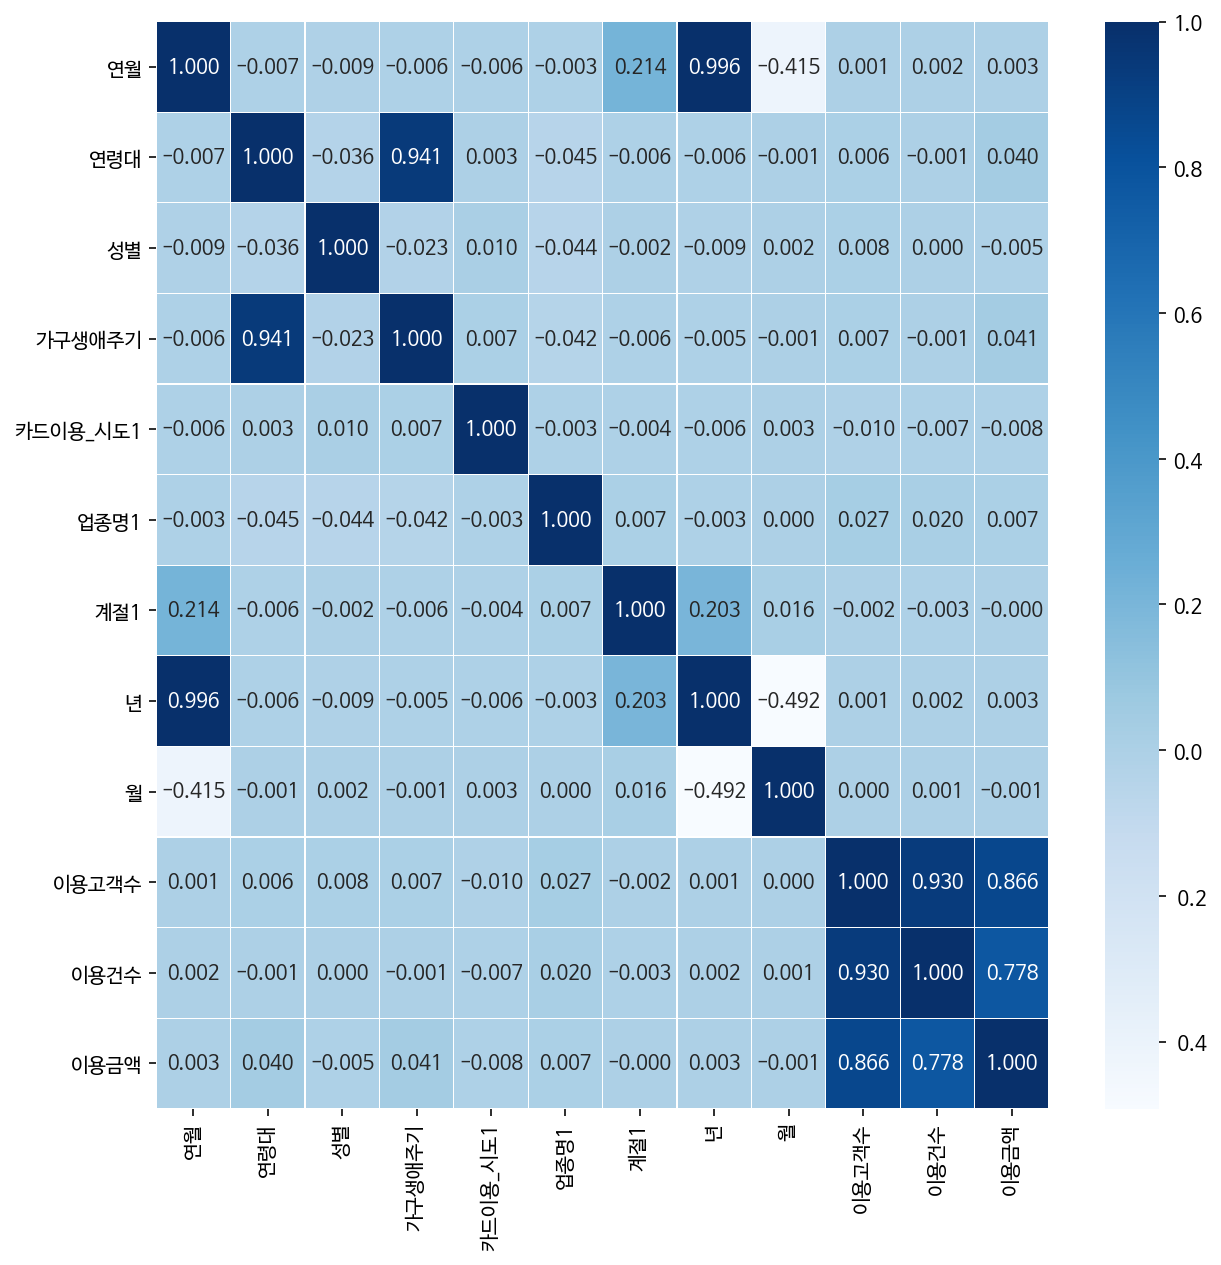

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '.3f', linewidths=.10, cmap='Blues')

이렇게 보면 불편하다고 교수님이 피드백을 주셨음. 하상각행렬로 나타내보기

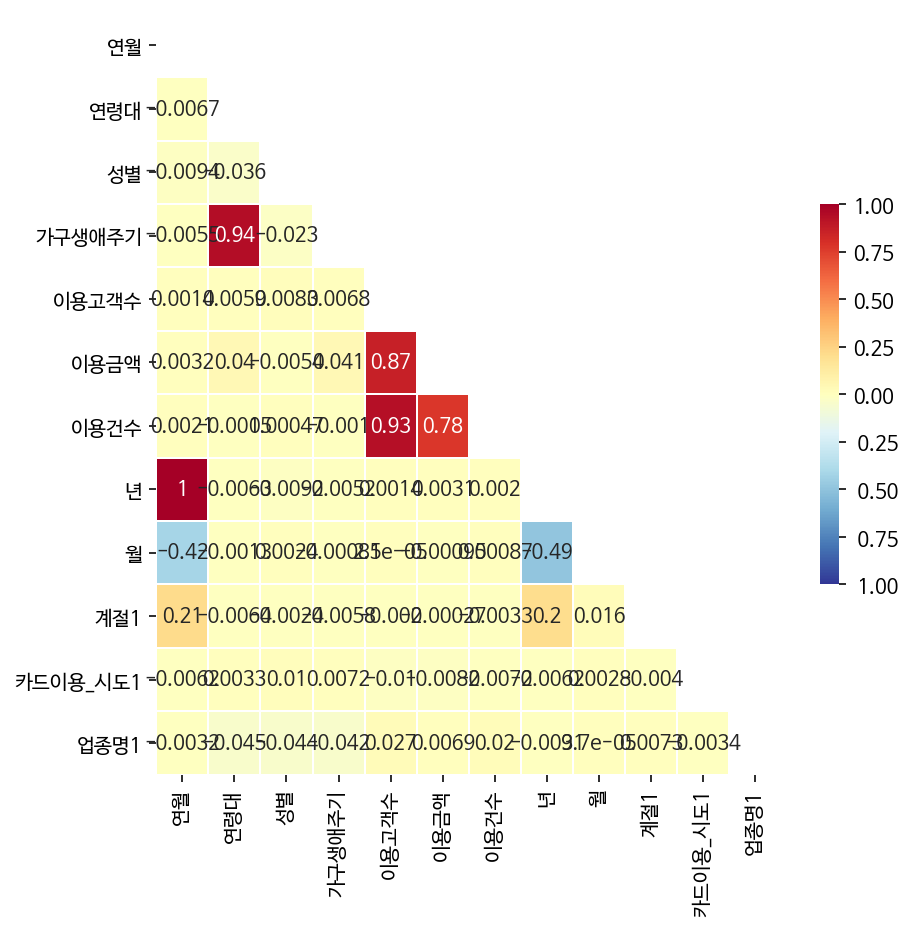

In [53]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 위 쪽 삼각형에 True, 아래 삼각형에 False
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 3-2) split test/train set

In [54]:
train= df.sample(frac=0.8,random_state=0)
test= df.drop(train.index)

In [55]:
print(np.shape(train))
print(np.shape(test))

(10, 12)
(2, 12)


In [56]:
train.head()

,연월,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절1,카드이용_시도1,업종명1
이용건수,0.002144,-0.001485,0.000469,-0.001011,0.930356,0.778102,1.000000,0.001970,0.000868,-0.003286,-0.007245,0.020446
업종명1,-0.003211,-0.044532,-0.043904,-0.042118,0.026676,0.006863,0.020446,-0.003082,0.000097,0.007262,-0.003389,1.000000
이용고객수,0.001432,0.005859,0.008258,0.006774,1.000000,0.866339,0.930356,0.001368,0.000025,-0.002020,-0.010169,0.026676
카드이용_시도1,-0.006197,0.003253,0.010217,0.007172,-0.010169,-0.008159,-0.007245,-0.006193,0.002769,-0.004025,1.000000,-0.003389
성별,-0.009399,-0.035971,1.000000,-0.023134,0.008258,-0.005424,0.000469,-0.009218,0.002361,-0.002360,0.010217,-0.043904


In [57]:
x_train=pd.DataFrame()
y_train=pd.DataFrame()
x_test=pd.DataFrame()
y_test=pd.DataFrame()
x_train['이용고객수']=train['이용고객수']
x_train['이용건수']=train['이용건수']
y_train['이용금액']=train['이용금액']
x_test['이용고객수']=test['이용고객수']
x_test['이용건수']=test['이용건수']
y_test['이용금액']=test['이용금액']

In [58]:
print("Shape of x_train :" ,x_train.shape)
print("Shape of y_train :" ,y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (10, 2)
Shape of y_train : (10, 1)
Shape of x_test : (2, 2)
Shape of y_test : (2, 1)


# 4.Modeling

### 4-1) 선형회귀모델

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model = LinearRegression(fit_intercept=True)
model = model.fit(x_train,y_train)

In [60]:
# explore W & b
W = model.coef_
b = model.intercept_

print("W =", W)
print("b =", b)
print()
print("Shape of W :", W.shape)
print("Shape of b :", b.shape)

W = [[ 1.07305664 -0.22655325]]
b = [0.00497456]

Shape of W : (1, 2)
Shape of b : (1,)


In [61]:
y_hat = np.dot(W,x_test.T) + b

In [62]:
print(model.score(x_train, y_train))

0.9975912198453295


약 75% 확률로 예측을 성공한다

### Light GBM

In [2]:
df=pd.read_csv('modeling.csv')
del df['Unnamed: 0']
df.head()

,연월,연령대,성별,가구생애주기,카드이용_시도1,업종명1,계절1,년,월,이용고객수,이용건수,이용금액
0,201901,20,1,1,1,1,4,2019,1,4,4,311200
1,201901,30,1,2,1,1,4,2019,1,7,8,1374500
2,201901,30,2,2,1,1,4,2019,1,6,6,818700
3,201901,40,1,3,1,1,4,2019,1,4,5,1717000
4,201901,40,1,4,1,1,4,2019,1,3,3,1047300


In [3]:
df['카드이용_시도1'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

In [4]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [5]:
raw_y = df['이용금액']
del df['이용금액']
raw_x=df

In [6]:
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

In [7]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [8]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [9]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.303991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 19758233, number of used features: 11
[LightGBM] [Info] Start training from score 2439225.871019
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 5.66237e+13
[200]	valid_0's l2: 1.99463e+13
[300]	valid_0's l2: 1.3213e+13
[400]	valid_0's l2: 1.13963e+13
[500]	valid_0's l2: 1.0627e+13
[600]	valid_0's l2: 1.02526e+13
[700]	valid_0's l2: 1.00397e+13
[800]	valid_0's l2: 9.90908e+12
[900]	valid_0's l2: 9.81006e+12
[1000]	valid_0's l2: 9.76273e+12
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 9.76273e+12


In [10]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [11]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  9762731121062.676
R2 score:  0.9676057969374112


In [12]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']

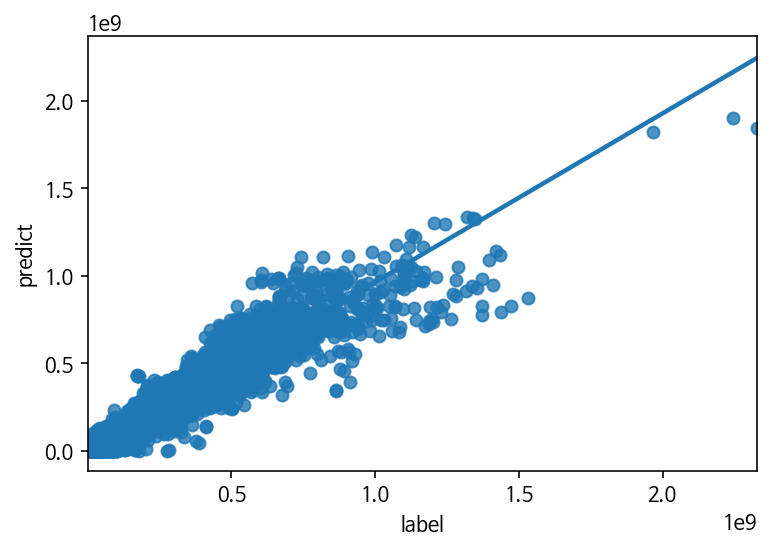

In [13]:
sns.regplot(x = 'label', y = 'predict', data = final_result)